# 1. Gompertz Model

In [5]:
import pandas as pd
base_path = ""
gcycles_path = base_path+"gompertz-parameters-per-cycle/"
df_hust_gompertz = pd.read_csv("hust_gompertz_params.csv")

df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,2-3.csv,0.966837,-3.957171,-16.188589,1751,0.163437,0.963437,0.963437
1,6-8.csv,1.010742,-2.903097,-7.691457,2450,0.170748,0.970748,0.970748
2,8-2.csv,0.970015,-3.770246,-12.932079,2041,0.161308,0.961308,0.961308
3,9-8.csv,0.979352,-3.566719,-10.580379,2308,0.158209,0.958209,0.958209


In [6]:
df_hust_gompertz[df_hust_gompertz['file']=='2-3.csv']

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,2-3.csv,0.966837,-3.957171,-16.188589,1751,0.163437,0.963437,0.963437


In [7]:
df_eg = pd.read_csv(gcycles_path+'2-3-hust_gompertz_params.csv')

df_eg.iloc[::100].head(20)

,Cycle number,k,a,b,rul,max_SoC_above_80,SoH,gompertz-value,gompertz-1st-derivative-value,gompertz-2nd-derivative-value
0,1,1.616522,-0.658601,1.000166,1751,30.795199,0.963437,1.046919e+00,0.454884,-0.257313
100,101,1.677531,-0.559649,1.074348,1651,30.795199,0.949218,1.039549e+00,0.534447,-0.299415
200,201,1.313708,-1.132289,-1.228506,1551,30.795199,0.941313,8.895036e-01,-0.426117,-0.319356
300,301,0.954775,-5.581222,-59.255045,1451,30.795199,0.935665,1.288537e-09,-0.000002,0.001795
400,401,0.966857,-4.167661,-24.672329,1351,30.795199,0.928994,6.263621e-01,-6.708843,-93.665670
500,501,0.999018,-3.047252,-10.509887,1251,30.795199,0.922697,8.370846e-01,-1.555848,-13.460008
600,601,1.059828,-2.242975,-5.282235,1151,30.795199,0.917238,8.721026e-01,-0.898087,-3.819060
700,701,1.097764,-1.957800,-4.094945,1051,30.795199,0.909291,8.835392e-01,-0.785459,-2.518143
800,801,1.073731,-2.127316,-4.750422,951,30.795199,0.901041,8.904167e-01,-0.791850,-3.057427
900,901,1.042271,-2.411027,-6.023780,851,30.795199,0.891861,8.972635e-01,-0.809698,-4.146763


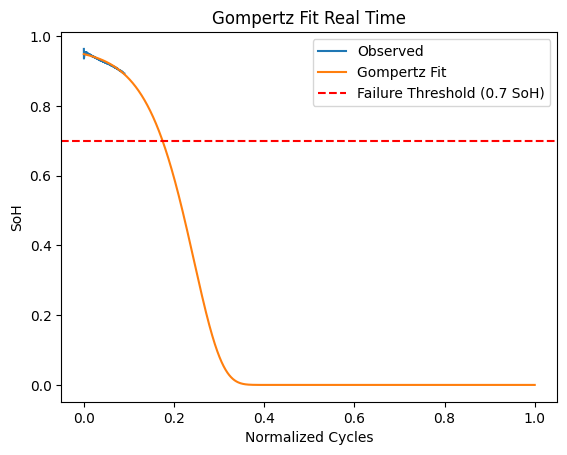

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

threshold = 900

#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))


x_data = np.array(df_eg['Cycle number'][:threshold].to_list())/10000.0
y_data = np.array(df_eg['SoH'][:threshold].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.966837,-3.957171,-16.188589]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
# plt.legend()
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Gompertz Fit Real Time")
plt.grid(False)
plt.legend()
plt.show()

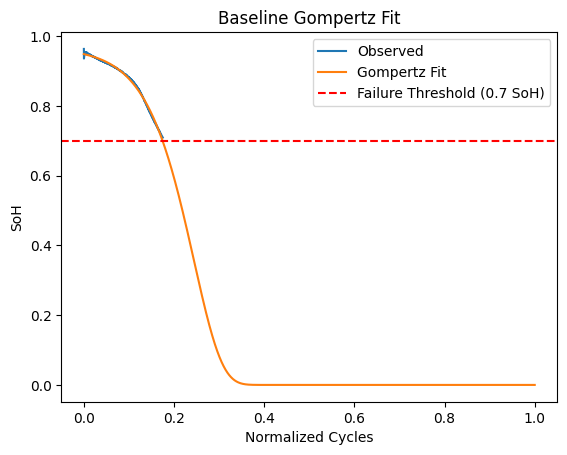

In [10]:
x_data = np.array(df_eg['Cycle number'].to_list())/10000.0
y_data = np.array(df_eg['SoH'].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.966837,-3.957171,-16.188589]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Baseline Gompertz Fit")
plt.grid(False)
plt.legend()
plt.show()

In [11]:
def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

print(f"Estimated RUL (cycle count to reach 70% SoH): {inverse_gompertz_func(0.7,*popt)*10000:.2f} cycles")

Estimated RUL (cycle count to reach 70% SoH): 1746.24 cycles


In [12]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error([1746], [1751])
rmse

5.0

## 1. a hust target values

In [13]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,2-3.csv,0.966837,-3.957171,-16.188589,1751,0.163437,0.963437,0.963437
1,6-8.csv,1.010742,-2.903097,-7.691457,2450,0.170748,0.970748,0.970748
2,8-2.csv,0.970015,-3.770246,-12.932079,2041,0.161308,0.961308,0.961308
3,9-8.csv,0.979352,-3.566719,-10.580379,2308,0.158209,0.958209,0.958209


In [14]:
list_of_pred_rul = [] #store predicted rul in a list
list_of_rmse = [] #store rmses
print('File : k   a   b   RUL   PRED_RUL     RMSE')
for i, row in df_hust_gompertz.iterrows():
    file,k,a,b,rul = row['file'],row['k'],row['a'],row['b'],row['rul']
    pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
    list_of_pred_rul.append(pred_rul)
    rmse = root_mean_squared_error([rul], [pred_rul])
    
    list_of_rmse.append(rmse)
    print(file,' : ',k,a,b, rul,pred_rul,rmse)

df_hust_gompertz['gompertz_predicted_rul'] = list_of_pred_rul
df_hust_gompertz['predicted_rul_rmse'] = list_of_rmse

File : k   a   b   RUL   PRED_RUL     RMSE
2-3.csv  :  0.9668372719916104 -3.957170914043441 -16.18858877320752 1751 1746.2379018898325 4.7620981101674715
6-8.csv  :  1.0107422402413857 -2.9030974279208404 -7.691457410392533 2450 2472.462705906711 22.462705906711108
8-2.csv  :  0.9700145295487478 -3.7702458997229775 -12.932078664579498 2041 2049.241684996166 8.241684996165986
9-8.csv  :  0.9793519574812406 -3.56671901539614 -10.580378906237897 2308 2339.719130683511 31.71913068351114


In [15]:
df_hust_gompertz['predicted_rul_rmse'].mean(),df_hust_gompertz['predicted_rul_rmse'].median(),df_hust_gompertz['rul'].mean()

(16.796404924138926, 15.352195451438547, 2137.5)

In [16]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH,gompertz_predicted_rul,predicted_rul_rmse
0,2-3.csv,0.966837,-3.957171,-16.188589,1751,0.163437,0.963437,0.963437,1746.237902,4.762098
1,6-8.csv,1.010742,-2.903097,-7.691457,2450,0.170748,0.970748,0.970748,2472.462706,22.462706
2,8-2.csv,0.970015,-3.770246,-12.932079,2041,0.161308,0.961308,0.961308,2049.241685,8.241685
3,9-8.csv,0.979352,-3.566719,-10.580379,2308,0.158209,0.958209,0.958209,2339.719131,31.719131


In [17]:
root_mean_squared_error(df_hust_gompertz['rul'].to_list(),df_hust_gompertz['gompertz_predicted_rul'].to_list())

20.00799438946805

In [18]:
# 1. Calculate your standard RMSE 
rmse = root_mean_squared_error(df_hust_gompertz['rul'], df_hust_gompertz['gompertz_predicted_rul'])

# 2. Calculate the mean of the actual RUL
mean_rul = df_hust_gompertz['rul'].mean()

# 3. Calculate RMSE as a percentage (NRMSE)
nrmse_percent = (rmse / mean_rul) * 100

print(f"RMSE: {rmse}")
print(f"RMSE as % of Mean RUL: {nrmse_percent:.2f}%")

RMSE: 20.00799438946805
RMSE as % of Mean RUL: 0.94%


In [19]:
print(f'Proof of concept rmse : {df_hust_gompertz['predicted_rul_rmse'].mean():.2f} %rmse : {df_hust_gompertz['predicted_rul_rmse'].mean()*100/df_hust_gompertz['rul'].mean():.2f} %')

Proof of concept rmse : 16.80 %rmse : 0.79 %


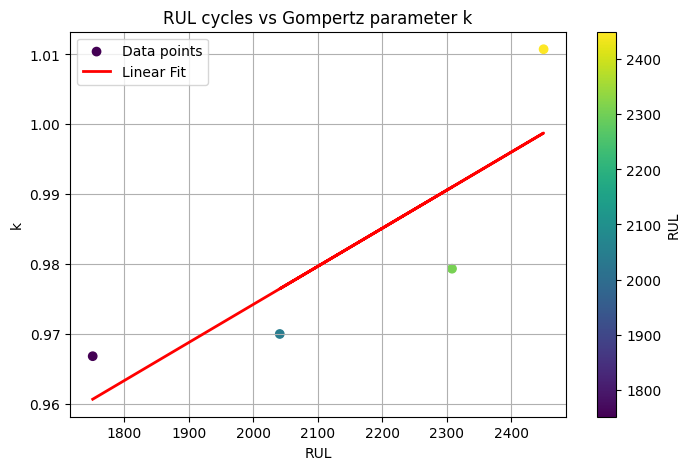

In [20]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['k']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('k')
plt.title('RUL cycles vs Gompertz parameter k')
plt.legend()
plt.grid(True)
plt.show()

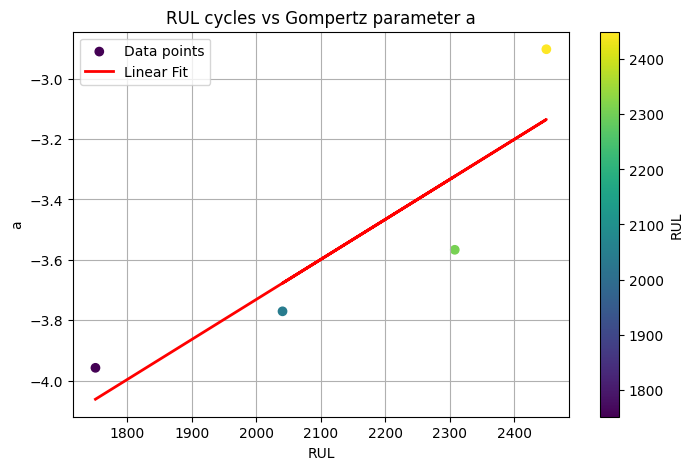

In [21]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['a']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('a')
plt.title('RUL cycles vs Gompertz parameter a')
plt.legend()
plt.grid(True)
plt.show()

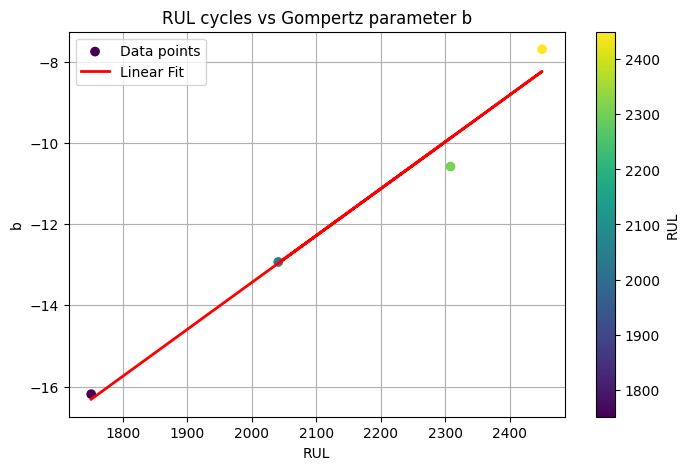

In [22]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['b']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('b')
plt.title('RUL cycles vs Gompertz parameter b')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    # plt.xticks(x, battery_ids)
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def multi_battery_scatter_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # Numeric x positions for scatter plot

    plt.figure(figsize=(12, 6))
    plt.scatter(x, true_ruls, color='blue', label='True RUL', marker='o')
    plt.scatter(x, pred_ruls, color='orange', label='Predicted RUL', marker='x')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [24]:
battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

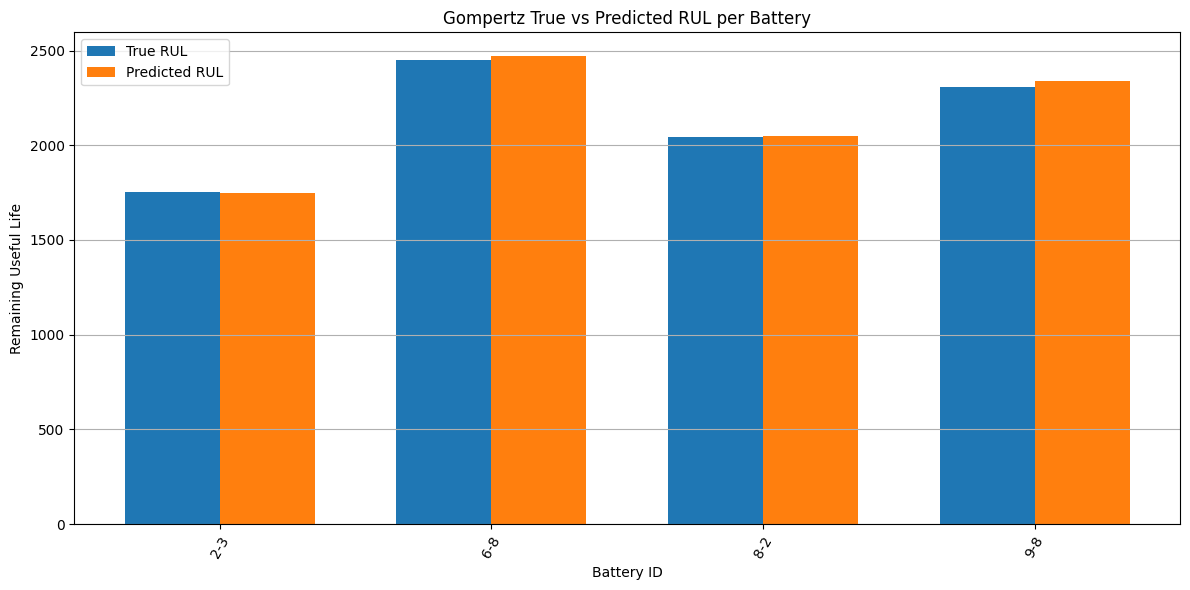

In [25]:
multi_battery_bar_plot(battery_data_dict)

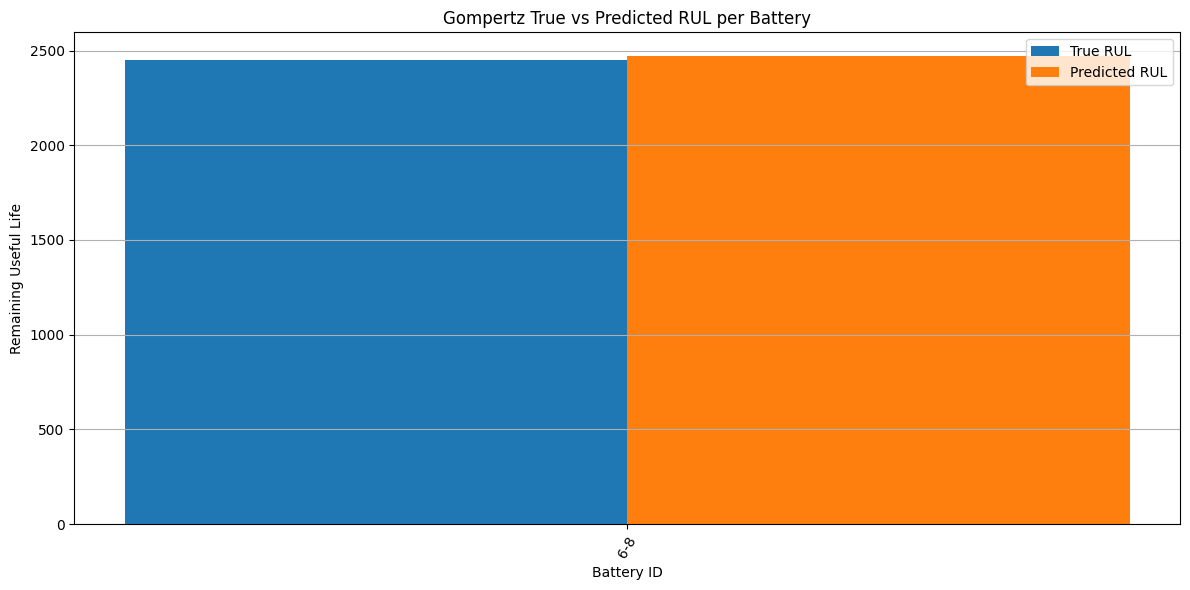

In [26]:
# test = ['7-6.csv','10-5.csv','7-7.csv','7-4.csv','4-7.csv','2-6.csv','10-2.csv','1-6.csv','8-4.csv','2-5.csv','1-1.csv','2-2.csv'] #My initial test csvs

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [
    '1-1',  '1-2',  '2-5',  '3-1',  '4-5',  '5-3',  '6-1',  '6-2',
    '6-6',  '6-8',  '7-5',  '7-6',  '8-1',  '8-5',  '8-6',  '8-8',
    '9-4',  '9-6',  '10-1', '10-4', '10-6', '10-7']

test = [i+'.csv' for i in test_ids] #similar to BatteryML HUST test cells 

battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    if row['file'] in test:
        battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

multi_battery_bar_plot(battery_data_dict)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    # Compute losses
    mse = mean_squared_error(true_ruls, pred_ruls)
    mae = mean_absolute_error(true_ruls, pred_ruls)
    
    # For Huber Loss, need tensors
    y_true_tensor = torch.tensor(true_ruls, dtype=torch.float32)
    y_pred_tensor = torch.tensor(pred_ruls, dtype=torch.float32)
    huber_loss_fn = nn.SmoothL1Loss()
    huber = huber_loss_fn(y_pred_tensor, y_true_tensor).item()

    # Print losses
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Huber Loss: {huber:.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

    # Plot
    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return mse,mae,huber,np.sqrt(mse)

Mean Squared Error (MSE): 504.5732
Mean Absolute Error (MAE): 22.4627
Huber Loss: 21.9626
Root Mean Squared Error (RMSE): 22.4627


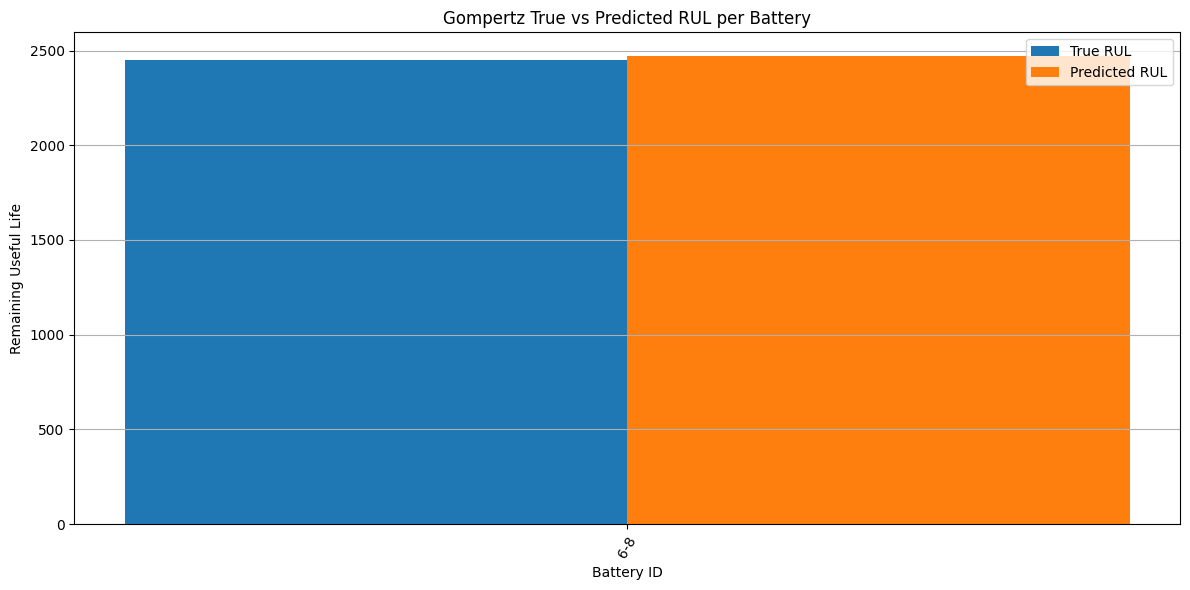

(504.5731566513941, 22.462705906711108, 21.962646484375, 22.462705906711108)

In [28]:
multi_battery_bar_plot(battery_data_dict)

## 1. b per cycle error calculation

In [29]:
import re
import os

files = os.listdir(base_path+"csv-summary/")
#Filter out non-csv files, folders or csv that don't start with a digit

filtered = [f for f in files if re.match(r'^\d', f) and f.endswith('.csv')]

print(len(filtered))

pairs = [re.match(r'^(\d+-\d+)', f).group(1) for f in filtered]

print(pairs)

4
['2-3', '6-8', '8-2', '9-8']


In [30]:
cycle_lengths = []
cycle_lengths_sort = {}
#Correlation of k, a and b with cycle number
##Place k, a and b of all cells in all cycles in one dataframe
for choice in pairs:
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    cycle_lengths.append(gompertz_df_full.shape[0])
    cycle_lengths_sort[choice] = gompertz_df_full.shape[0]
print(f"Max : {max(cycle_lengths)}, Min : {min(cycle_lengths)}")


#sort pairs by RUL
pairs = sorted(cycle_lengths_sort, key=cycle_lengths_sort.get)
print(pairs)

Max : 2450, Min : 1751
['2-3', '8-2', '9-8', '6-8']


In [31]:
# Consolidate k,a,b data per cycle
unified_gompertz = {}
for choice in pairs:
    #get file
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    #add cell name
    gompertz_df_full['cell_name'] = choice
    for i in range(1,max(cycle_lengths)+1,1):
        try:
            temp_data = gompertz_df_full[gompertz_df_full["Cycle number"]==i].iloc[0].to_dict()
        except:
            temp_data = {'Cycle number': i, 'k': None, 'a': None,'b': None, 'rul': None, 'max_SoC_above_80': None,'SoH': None, 'cell_name': choice}
        try:
            unified_gompertz[i].append(temp_data)
        except:
            unified_gompertz[i] = []
            unified_gompertz[i].append(temp_data)

In [32]:
unified_gompertz.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [33]:
import pickle
#help(pickle)
#save consolidated gompertz per cycle as a pickle file

with open('unified_gompertz.pkl', 'wb') as file:
    pickle.dump(unified_gompertz, file)

In [34]:
unified_gompertz[1143]

[{'Cycle number': 1143,
  'k': 0.9956235631893128,
  'a': -3.0928379839008158,
  'b': -9.937313212073311,
  'rul': 609,
  'max_SoC_above_80': 30.79519893939332,
  'SoH': 0.8614707246376782,
  'gompertz-value': 0.9162274755399958,
  'gompertz-1st-derivative-value': -0.75665374444473,
  'gompertz-2nd-derivative-value': -6.894233258307717,
  'cell_name': '2-3'},
 {'Cycle number': 1143,
  'k': 1.1045282419783693,
  'a': -1.9276847695934407,
  'b': -3.9309015470303375,
  'rul': 899,
  'max_SoC_above_80': 29.94845921717172,
  'SoH': 0.8791868533157661,
  'gompertz-value': 0.897865611875783,
  'gompertz-1st-derivative-value': -0.7311308789834162,
  'gompertz-2nd-derivative-value': -2.278644515103041,
  'cell_name': '8-2'},
 {'Cycle number': 1143,
  'k': 1.154995191713283,
  'a': -1.6704158292585565,
  'b': -2.690668573260629,
  'rul': 1166,
  'max_SoC_above_80': 30.093004191918595,
  'SoH': 0.8920621892841469,
  'gompertz-value': 0.8927781793440704,
  'gompertz-1st-derivative-value': -0.61859

In [35]:
#Compute Gompertz RUL prediction per cycle
gompertz_results = {}
for i in unified_gompertz.keys():
    ruls, pred_ruls = [],[]
    for k, j in enumerate(unified_gompertz[i]):
        k,a,b,rul = j['k'],j['a'],j['b'],unified_gompertz[1][k]['rul']
        if k == None: #skip over cells that have reached rul
            continue
        else:
            pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
            #print(i,j['k'],j['a'],j['b'],j['rul'],pred_rul)
            ruls.append(rul)
            pred_ruls.append(pred_rul)
    gompertz_results[i] = {'ruls':ruls,'pred_ruls':pred_ruls}
    #break

    # 2. Calculate the mean of the actual RUL
    mean_rul = np.mean(ruls)
    
    # 3. Calculate RMSE as a percentage (NRMSE)
    nrmse_percent = (rmse / mean_rul) * 100

In [37]:
gompertz_results[1000]

{'ruls': [1751, 2041, 2308, 2450],
 'pred_ruls': [2283.662921571247,
  2913.6724812062635,
  4730.2034127371635,
  4480.685320702743]}

In [38]:
cycle_rmse = {}
cycle_nrmse = {}
for i in gompertz_results.keys():
    cycle_rmse[i] = root_mean_squared_error(gompertz_results[i]['ruls'],gompertz_results[i]['pred_ruls'])
    cycle_nrmse[i] = (cycle_rmse[i]/np.mean(gompertz_results[i]['ruls']))*100
print(cycle_rmse)

{1: 6945.3163775218445, 2: 6836.516568875954, 3: 6787.37319904143, 4: 6760.5982750959565, 5: 6743.486843599991, 6: 6729.186114026159, 7: 6717.767647251222, 8: 6707.8686291270415, 9: 6699.510886105649, 10: 6692.578184481894, 11: 6686.165784538994, 12: 6680.792315534101, 13: 6675.680161042861, 14: 5922.854359530771, 15: 4699.022959341042, 16: 3519.159778738009, 17: 2122.734205875, 18: 2235.5592700668744, 19: 2802.0712914401843, 20: 2209.10216782032, 21: 2329.9592600478454, 22: 2267.7483524185627, 23: 2209.7854838581434, 24: 2193.9849873968233, 25: 2201.8197931210834, 26: 2209.921110319333, 27: 2186.8785188676784, 28: 2220.3082504755807, 29: 2258.779760333159, 30: 2324.565534325539, 31: 2246.5261675595934, 32: 2180.7800416625387, 33: 2206.1496269284207, 34: 2225.152761314935, 35: 2276.81175823713, 36: 2179.2456720334526, 37: 2177.03917456217, 38: 2196.702179704803, 39: 2193.9434674203776, 40: 2248.404304783771, 41: 2243.617183490217, 42: 2264.115420812084, 43: 2242.284589452216, 44: 2253.

In [39]:
print(cycle_nrmse)

{1: 324.92708198932604, 2: 319.83703246203294, 3: 317.5379274405347, 4: 316.28529941969384, 5: 315.4847646128651, 6: 314.81572463280276, 7: 314.2815273567823, 8: 313.8184153977563, 9: 313.42740987628764, 10: 313.10307295821724, 11: 312.80307763925117, 12: 312.5516872764492, 13: 312.312522154052, 14: 277.0926016154747, 15: 219.83733143115987, 16: 164.63905397604722, 17: 99.30920261403509, 18: 104.58756819026314, 19: 131.09105457030103, 20: 103.34980902083369, 21: 109.00394199054249, 22: 106.09349017162866, 23: 103.3817770226032, 24: 102.6425725097929, 25: 103.00911312847174, 26: 103.38812212020272, 27: 102.3101061458563, 28: 103.874070197688, 29: 105.67390691617118, 30: 108.75160394505446, 31: 105.10063941799268, 32: 102.02479727076204, 33: 103.21167845279162, 34: 104.10071397964609, 35: 106.51750915729264, 36: 101.95301389630187, 37: 101.84978594442902, 38: 102.76969261776856, 39: 102.6406300547545, 40: 105.18850548696004, 41: 104.96454659603354, 42: 105.92352845904485, 43: 104.9022030

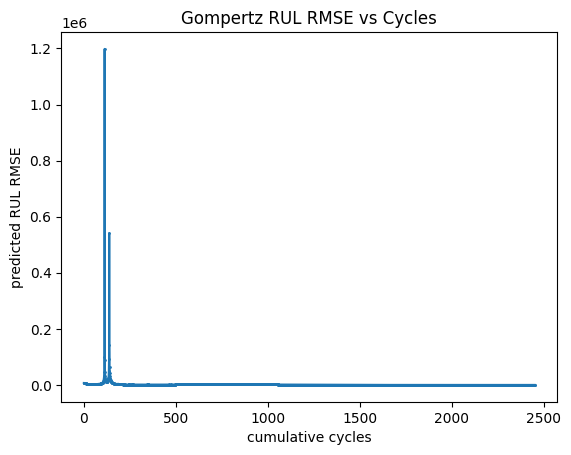

In [40]:
#Plot rmse per cycle
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.grid(False)
plt.show()

In [41]:
# help(plt.yscale)

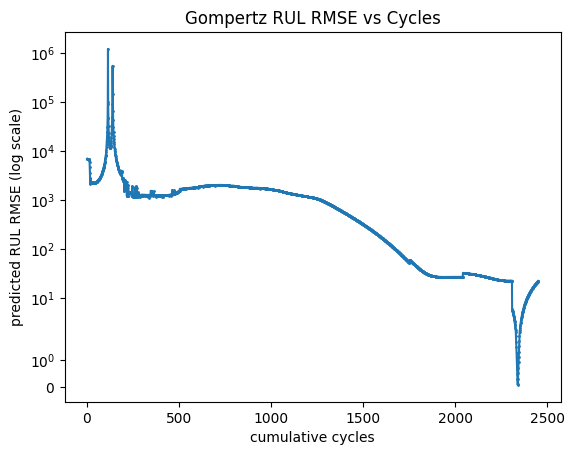

In [42]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
plt.show()

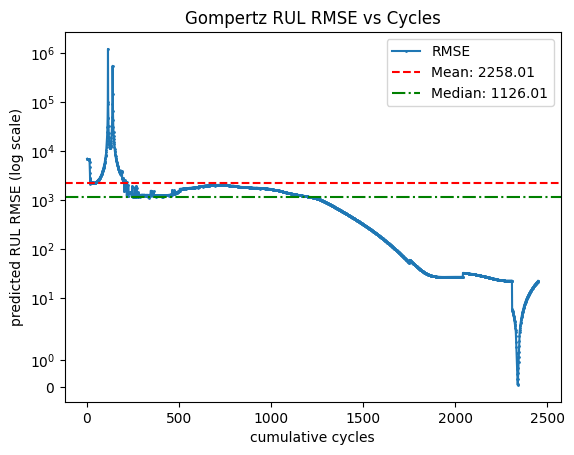

In [43]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

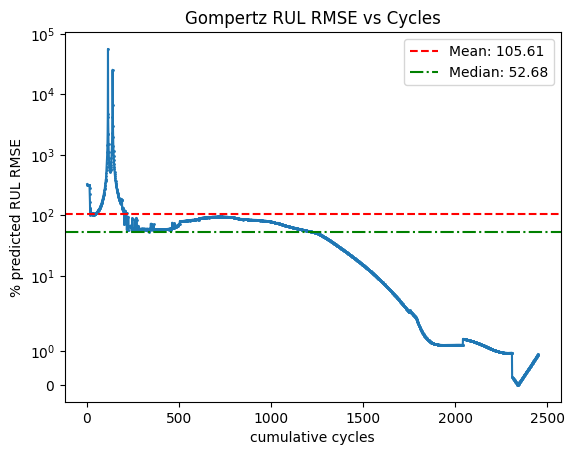

In [44]:
#Plot rmse per cycle
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('% predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

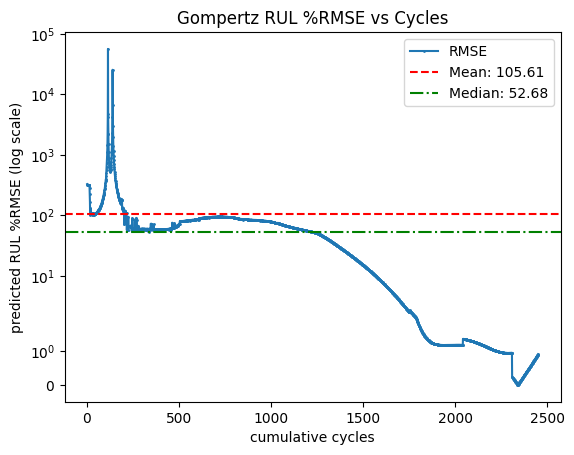

In [45]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE (log scale)')
plt.title('Gompertz RUL %RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

In [46]:
#save gompertz results
with open('gompertz_results.pkl', 'wb') as file:
    pickle.dump(gompertz_results, file)

#save gompertz rmse results
with open('gompertz_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [47]:
np.median(y),np.mean(y)

(52.67862994905834, 105.61055956972291)

# 2. NNs

In [48]:
version = '8'
MAX_WINDOW = 2689

### prepare data

In [50]:
WINDOW_SIZES = [100] #[5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100,500,1000] #[i for i in range (5,100,5)]
print("WINDOW SIZES TO TEST : ",WINDOW_SIZES,len(WINDOW_SIZES))


# Make list of CSV paths
main_files_path = 'gompertz-parameters-per-cycle/'
#/kaggle/input/generate-hust-data-gompertz-k-a-b/1-2-hust_gompertz_params.csv
csv_files = os.listdir(main_files_path)
csv_files = [f for f in csv_files if re.match(r'^\d', f) and f.endswith('-hust_gompertz_params.csv')]

#BatteryML like train-val-test split
csv_files = [f.removesuffix('-hust_gompertz_params.csv') for f in csv_files]
print(csv_files)

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [f for f in csv_files if f not in train_ids]

print(test_ids,len(test_ids))

#csv_paths = [os.path.join(main_files_path, file) for file in csv_files]
#separate according to train, val and test
train_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in train_ids]

testing_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in test_ids]

val_paths = testing_paths[:int(len(testing_paths)*0.5)]
test_paths = testing_paths[int(len(testing_paths)*0.5):]

print(len(train_paths), len(val_paths), len(test_paths))

WINDOW SIZES TO TEST :  [100] 1
['8-2', '6-8', '9-8', '2-3']
['6-8'] 1
55 0 1


## 2a. NNs that predict RUL from SoH

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [52]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    # X.append(list(df['SoH'])[I:window_size+I])
    
    # y.append(list(df['rul'])[:1])
    X.append(list(df['SoH'])[I:window_size+I])
    y.append(list(df['rul'])[window_size+I:1+I+window_size])
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [53]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

In [54]:
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        # Run LSTM
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        
        prediction = self.fc(last_time_step)
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
# model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-RUL-best_lstm_model-window-100.pth",map_location=torch.device(device)))
model.load_state_dict(torch.load(f"models/SoH-to-RUL-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n RMSE for 100th cycle : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numbers had been normalized using 10000
print('\n Test %RMSE for 100th cycle by SoH to RUL prediction : ',(test_rmse/len(test_loader)*10000)/(np.mean(y_test.cpu().detach().numpy())*10000)*100)
# print(np.mean(y_test.cpu().detach().numpy())*10000)
# print(test_rmse/len(test_loader)*10000)

tensor([[0.1890]], device='cuda:0', grad_fn=<AddmmBackward0>) 
 tensor([[0.2350]])

 RMSE for 100th cycle :  460.1699113845825

 Test %RMSE for 100th cycle by SoH to RUL prediction :  19.581698406457136


In [55]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) >= window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor

In [56]:
from tqdm import tqdm
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW)):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_pred = model(X_test)
        #print(y_pred,'\n',y_test)
        #inference for test results
        test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
    
    #print(f'\n Test RMSE for cycle {I} SoH to RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numbers had been normalized using 10000
    if len(test_loader) > 0:
        cycle_rmse[I] = test_rmse/len(test_loader)*10000
        cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/((np.mean(y_test.cpu().detach().numpy())*10000)+I)*100

100%|██████████| 2589/2589 [00:10<00:00, 250.19it/s]


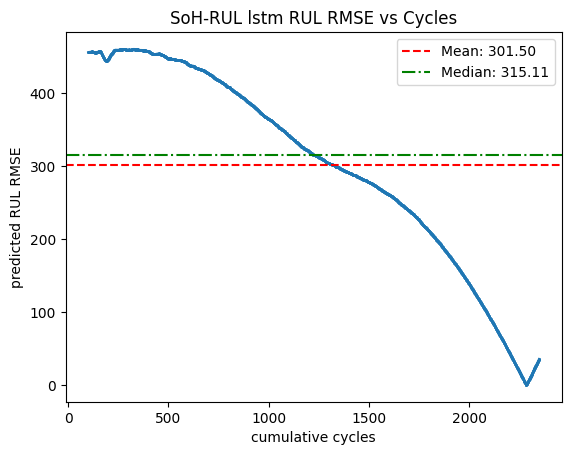

In [57]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

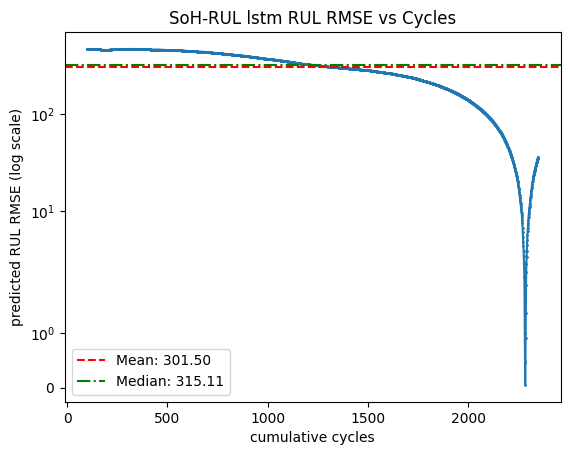

In [58]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

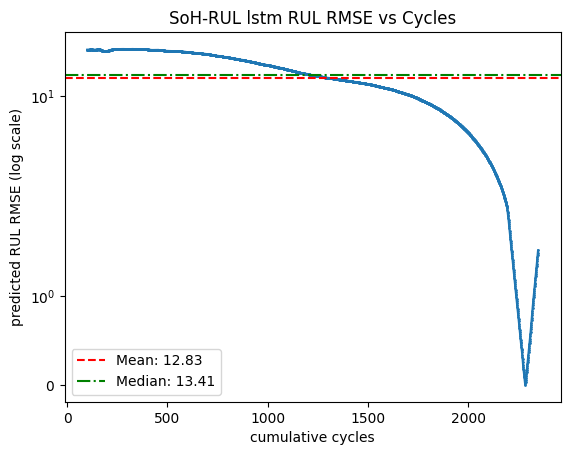

In [59]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

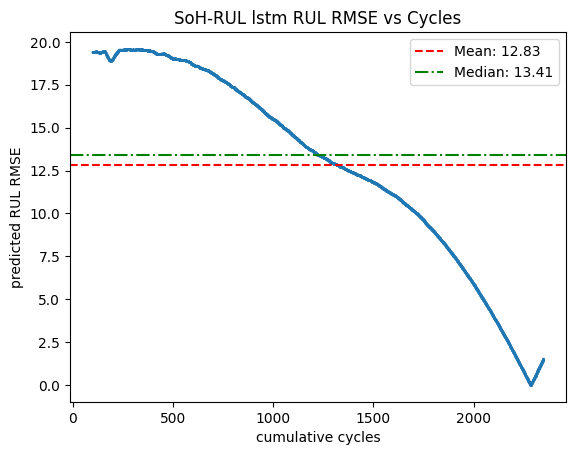

In [60]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [61]:
#save SoH to RUL rmse results
with open('SOH_to_RUL_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

## 2b. LSTMs that predict SoH from SoH

In [62]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        SoH = df[model_columns]
        X, y = df_to_X_y_tensor(SoH, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,i=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list = get_x_y_lists(paths)

    if INPUT_SIZE == 1:
        # Concatenate all X and y
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    else:
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    
    #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
    
    #DataLoader
    #print("load : ")
    loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
    #print(f"{data_type}loader lengths : ",loader.__len__())
    return loader,X_1,y_1

In [63]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv


In [64]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML)
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [32, 10, 5]
        
        # Run LSTM
        # lstm_out shape: [32, 10, 64]
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        # last_time_step shape: [32, 64]
        
        # Project to 5 output features
        prediction = self.fc(last_time_step)
        # prediction shape: [32, 5]
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
# model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
model.load_state_dict(torch.load(f"models/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    #print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n Test RMSE for SoH to SoH prediction : ',test_rmse/len(test_loader))


 Test RMSE for SoH to SoH prediction :  0.0002384781837463379


In [65]:
# X_test[0],y_test[0],y_pred[0]

In [66]:
# for i in range(100, 3000):
#     for X_test, y_test in test_loader:
#         X_test = X_test.to(device)
#         y_pred = model(X_test)
#         X_test = torch.cat((X_test[0][1:], y_pred[0].detach().view(1, 1)), dim=0)

all_step_predictions = []
current_window = X_test.clone() # Start with the initial X from loader

# Number of steps you want to forecast into the future
forecast_steps = 3000 

for _ in range(forecast_steps):
    # 1. Get prediction for current window
    # y_pred shape: [Batch, 1] (Next Capacity)
    y_pred = model(current_window)
    
    # Store for evaluation
    all_step_predictions.append(y_pred.detach())

    # 2. UPDATE ALL BATCHES AT ONCE
    # Assuming the value you append is the 1st column of your prediction
    # or the only column if predicting capacity directly.
    next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
    
    # Drop index 0, append new value to end
    current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)

# Now current_window is updated for the next iteration

In [67]:
all_step_predictions[-1]

tensor([[0.6778]], device='cuda:0')

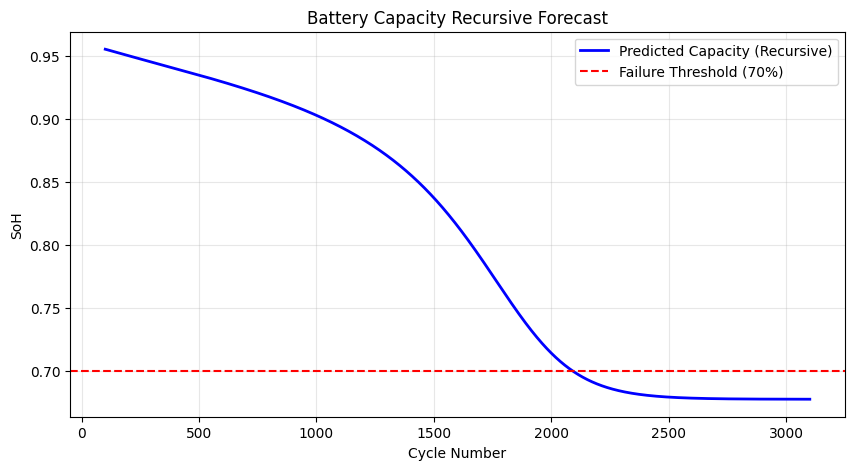

In [68]:
# 1. Stack the list into a single tensor: [Steps, Batch, 4]
all_preds_tensor = torch.stack(all_step_predictions) 
for i in range(0,len(all_step_predictions[-1])):
    # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
    # Shape will be [Steps]
    first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
    
    # 3. Create a time/cycle axis for the forecast
    start_cycle = 101 # Assuming your window was 100
    cycles = range(start_cycle, start_cycle + len(first_battery_forecast))
    
    # 4. Plot
    plt.figure(figsize=(10, 5))
    plt.plot(cycles, first_battery_forecast, label='Predicted Capacity (Recursive)', color='blue', linewidth=2)
    plt.axhline(y=0.7, color='red', linestyle='--', label='Failure Threshold (70%)')
    
    plt.title('Battery Capacity Recursive Forecast')
    plt.xlabel('Cycle Number')
    plt.ylabel('SoH')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [69]:
# 1. Stack into a single tensor: [Steps, Batch, Features]
# We want to analyze feature 0 (Capacity)
all_preds_tensor = torch.stack(all_step_predictions) 
capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]

# 2. Create a boolean mask where Capacity <= 0.7
# Shape: [Steps, Batch]
is_failed = capacity_forecasts <= 0.7

# 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
# torch.argmax returns the index of the first 'True' it finds.
# If a cell never hits 0.7, it returns 0 (we will handle this below).
steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)

# 4. Handle cells that never reached the threshold
# argmax returns 0 if no True is found. We check if the value at that 
# index is actually <= 0.7 to verify it really failed.
never_failed = ~is_failed.any(dim=0)
steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure

# 5. Convert to list or print results
failure_steps_list = steps_to_failure.tolist()

for i, steps in enumerate(failure_steps_list):
    status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
    print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")

Cell 0: 2092 steps to reach 0.7 (REACHED EoL)


In [70]:
'''
        [[0.1208],
        [0.1642],
        [0.2578],
        [0.1509],
        [0.1808],
        [0.1248],
        [0.2589],
        [0.1286],
        [0.1875],
        [0.1775],
        [0.1404]]
'''
print()

# RMSE per cycle

In [71]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) > window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[:1])
        # X.append(list(df['SoH'])[I:window_size+I])
        # y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor
    
def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [72]:
def forecast_RUL(loader,X_test,y_test,model):
    ## A function to handle the model's recursive nature and compute RUL
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
    
    # Now current_window is updated for the next iteration
    
    # 1. Stack into a single tensor: [Steps, Batch, Features]
    # We want to analyze feature 0 (Capacity)
    all_preds_tensor = torch.stack(all_step_predictions) 
    capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]
    
    # 2. Create a boolean mask where Capacity <= 0.7
    # Shape: [Steps, Batch]
    is_failed = capacity_forecasts <= 0.7
    
    # 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
    # torch.argmax returns the index of the first 'True' it finds.
    # If a cell never hits 0.7, it returns 0 (we will handle this below).
    steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)
    
    # 4. Handle cells that never reached the threshold
    # argmax returns 0 if no True is found. We check if the value at that 
    # index is actually <= 0.7 to verify it really failed.
    never_failed = ~is_failed.any(dim=0)
    steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure
    
    # 5. Convert to list or print results
    failure_steps_list = steps_to_failure.tolist()
    RUL_steps = []
    for i, steps in enumerate(failure_steps_list):
        status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
        #print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")
        RUL_steps.append(steps+WINDOW_SIZE+I)
    return RUL_steps

In [73]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    break
    # y_pred = model(X_test)
    # #print(y_pred,'\n',y_test)
    # #inference for test results
    # test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
y_preds = forecast_RUL(test_loader,X_test,y_test,model)
test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)
print('RMSE for 100th cycle : ', test_rmse)
print('% RMSE for 100th cycle : ', test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100,'%')

RMSE for 100th cycle :  358.0
% RMSE for 100th cycle :  14.612244613564847 %


In [74]:
y_test*10000

tensor([[2450.]])

In [75]:
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in range(WINDOW_SIZE,MAX_WINDOW):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    if len(test_loader) > 0:  
        for X_test, y_test in test_loader:
            X_test = X_test.to(device)
            break
        y_preds = forecast_RUL(test_loader,X_test,y_test,model)
        test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)#multiply by 10,000 because cycle numers had been normalized using 10000
        print(f'RMSE for cycle {I} is {test_rmse}')
    
    
        cycle_rmse[I] = test_rmse
        cycle_nrmse[I] = test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100

RMSE for cycle 100 is 423.0
RMSE for cycle 101 is 424.0
RMSE for cycle 102 is 425.0
RMSE for cycle 103 is 425.0
RMSE for cycle 104 is 426.0
RMSE for cycle 105 is 426.0
RMSE for cycle 106 is 425.0
RMSE for cycle 107 is 425.0
RMSE for cycle 108 is 425.0
RMSE for cycle 109 is 426.0
RMSE for cycle 110 is 427.0
RMSE for cycle 111 is 427.0
RMSE for cycle 112 is 427.0
RMSE for cycle 113 is 427.0
RMSE for cycle 114 is 429.0
RMSE for cycle 115 is 430.0
RMSE for cycle 116 is 431.0
RMSE for cycle 117 is 431.0
RMSE for cycle 118 is 430.0
RMSE for cycle 119 is 430.0
RMSE for cycle 120 is 430.0
RMSE for cycle 121 is 429.0
RMSE for cycle 122 is 431.0
RMSE for cycle 123 is 432.0
RMSE for cycle 124 is 428.0
RMSE for cycle 125 is 429.0
RMSE for cycle 126 is 429.0
RMSE for cycle 127 is 430.0
RMSE for cycle 128 is 430.0
RMSE for cycle 129 is 432.0
RMSE for cycle 130 is 433.0
RMSE for cycle 131 is 434.0
RMSE for cycle 132 is 434.0
RMSE for cycle 133 is 435.0
RMSE for cycle 134 is 435.0
RMSE for cycle 135 i

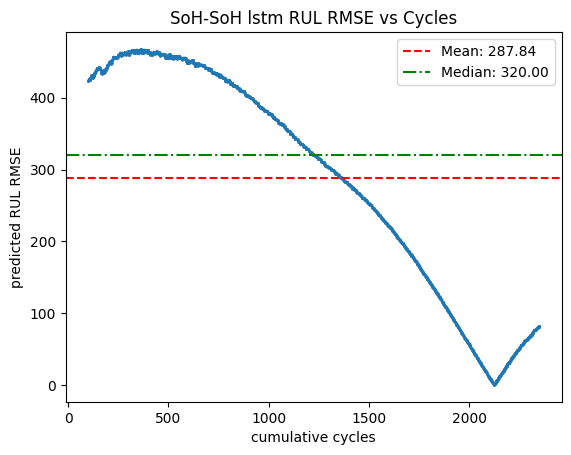

In [76]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

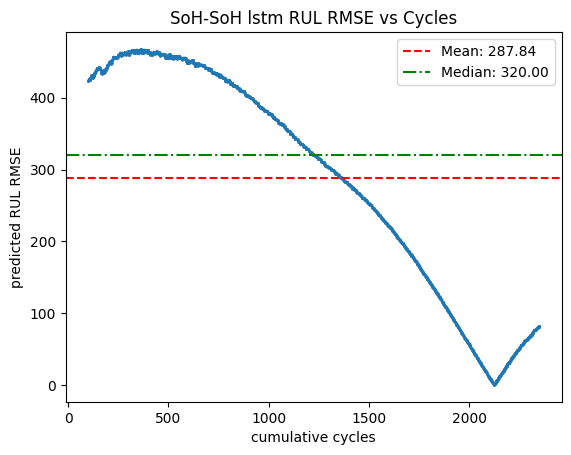

In [77]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

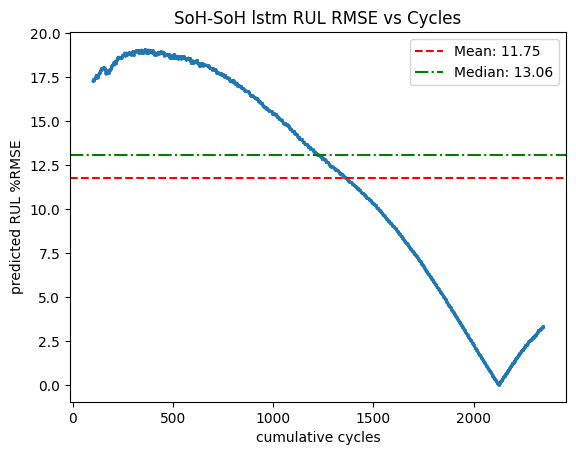

In [78]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [79]:
model

LSTMModel(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [80]:
#save SoH to SoH RUL rmse results
with open('SOH_to_SoH_RUL_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

# 3. GILSTM

## 3a. LSTMs that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [81]:
model_columns = ['SoH']

print("# B: Setup variables and functions")
# # Set variables
# WINDOW_SIZE = 35
model_type = ['lstm','seq2seq-lstm','pinn'][2]

cutoff_soh = 0.70
# Set Computing Environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = len(model_columns)
OUTPUT_SIZE =3 #RUL #len(model_columns)#1 #controls how many values the lstm outputs
num_epochs = 1000 #60
batch_size = 4 #32 #because the data is little a small batch size is better when training
normalize_soh = False
I = 0
if normalize_soh:
    soh_normalization_constant = 115.0 #115.0 may be better as it allows bounding between 0 and 1
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer
else:
    soh_normalization_constant = 1.0
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer

class PhysicsInformedLSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=128):
        super().__init__()
        # Direct mapping: Input -> LSTM -> FC -> Output
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(128, 3) 
        
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor
    
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
        '''
        Converts a time series into (X, y) tensors for LSTM training.
        
        X shape: (num_samples, window_size, 1)
        y shape: (num_samples, 1)
        '''
        # if isinstance(df, (pd.DataFrame, pd.Series)):
        #     df_as_np = df.to_numpy()
        # else:
        #     df_as_np = df  # Assume already numpy
    
        X, y , y2 = [], [], []
        #for i in range(len(df_as_np) - window_size):
        #for i in range(len(df)-window_size):  
        if len(df) > window_size+I:
            X.append(list(df['SoH'])[I:window_size+I])
            #y.append([df_as_np[i + window_size:i + window_size+output_size]])
            y.append([list(df['k'])[-1],list(df['a'])[-1],list(df['b'])[-1]])
            #append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
            y2.append(list(df['rul'])[:1])
        X,y,y2 = np.array(X),np.array(y), np.array(y2)
        X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
        y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
        y_2_tensor = torch.tensor(y2, dtype=torch.float32)  #bug was here written y instead of y2
        return X_tensor, y_tensor, y_2_tensor
            
    
def get_x_y_lists(paths):
    X_list,y_list,y_target = [],[],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y , y1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
        y_target.append(y1) #RUL
    return X_list,y_list, y_target

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list, y_target = get_x_y_lists(paths)

    batch_size = torch.cat(X_list, dim=0).shape[0]
    
    if INPUT_SIZE == 1:
        # Concatenate all X and y
        X_1,y_1,y_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(batch_size,-1),torch.cat(y_target, dim=0).view(batch_size,-1)
    else:
        X_1,y_1,y_2 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(y_target, dim=0).view(-1,INPUT_SIZE)
    
    print(f" X_{data_type} shape : {X_1.shape} , y_{data_type} shape : {y_1.shape} ，y_2{data_type} shape: {y_2.shape}" )
    
    #DataLoader
    print("load : ")
    loader = DataLoader(TensorDataset(X_1, y_1, y_2), batch_size=32, shuffle=shuffle)
    print(f"{data_type}loader lengths : ",loader.__len__())
    return loader,X_1,y_1, y_2

data_use = {0:["train"],1:["val"],2:["test"]}

test_loader,X_test,y_test,y_test_target = give_paths_get_loaders(test_paths,data_use[2])
model = PhysicsInformedLSTM(input_size=INPUT_SIZE).to(device)

def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

# B: Setup variables and functions
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_['test'] shape : torch.Size([1, 100, 1]) , y_['test'] shape : torch.Size([1, 3]) ，y_2['test'] shape: torch.Size([1, 1])
load : 
['test']loader lengths :  1


In [83]:
model.load_state_dict(torch.load(f"models/SoH-to-kab-best_lstm_model-window-100_model_pinn_data_all.pth",map_location=torch.device(device)))

cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW-101)):
    test_rmse = 0
    test_loader,X_test,y_test,y_target = give_paths_get_loaders(test_paths,'test')
    for X_test, y_test, y_target in test_loader:
        X_test = X_test.to(device)
        y_pred = model(X_test)
        
        k_pred = y_pred[:, 0].cpu().detach().numpy()
        a_pred = y_pred[:, 1].cpu().detach().numpy()
        b_pred = y_pred[:, 2].cpu().detach().numpy()
        results = np.round(inverse_gompertz_func(y=0.7, k=k_pred, a=a_pred, b=b_pred), decimals=4)
        #print(results,'\n',y_target)
        #inference for test results
        test_rmse += root_mean_squared_error(results,y_target)
    
    print(f'\n Test RMSE for cycle {I} SoH to k,a,b then RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numers had been normalized using 10000
    if len(test_loader) > 0:
        cycle_rmse[I] = test_rmse/len(test_loader)*10000
        cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/(np.mean(y_target.cpu().detach().numpy())*10000)*100
    #break
    

  1%|          | 17/2488 [00:00<00:14, 167.80it/s]

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 100 SoH to k,a,b then RUL prediction :  630.0000846385956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 101 SoH to k,a,b then RUL prediction :  630.0000846385956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 102 SoH to k,a,b then RUL prediction :  630.0000846385956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: tor

  2%|▏         | 56/2488 [00:00<00:13, 183.42it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 135 SoH to k,a,b then RUL prediction :  636.0000371932983
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 136 SoH to k,a,b then RUL prediction :  636.0000371932983
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 137 SoH to k,a,b then RUL prediction :  637.0000541210175
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

  4%|▍         | 96/2488 [00:00<00:12, 190.10it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 174 SoH to k,a,b then RUL prediction :  641.9999897480011
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 175 SoH to k,a,b then RUL prediction :  643.0000066757202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 176 SoH to k,a,b then RUL prediction :  643.0000066757202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

  5%|▌         | 136/2488 [00:00<00:12, 193.02it/s]

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 214 SoH to k,a,b then RUL prediction :  648.0000913143158
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 215 SoH to k,a,b then RUL prediction :  648.0000913143158
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 216 SoH to k,a,b then RUL prediction :  648.0000913143158
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: tor

  7%|▋         | 176/2488 [00:00<00:11, 194.19it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 253 SoH to k,a,b then RUL prediction :  653.0000269412994
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 254 SoH to k,a,b then RUL prediction :  654.0000438690186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 255 SoH to k,a,b then RUL prediction :  654.0000438690186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

  9%|▊         | 216/2488 [00:01<00:11, 195.05it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 293 SoH to k,a,b then RUL prediction :  658.9999794960022
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 294 SoH to k,a,b then RUL prediction :  658.9999794960022
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 295 SoH to k,a,b then RUL prediction :  658.9999794960022
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 10%|█         | 256/2488 [00:01<00:11, 193.76it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 333 SoH to k,a,b then RUL prediction :  664.0000641345978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 334 SoH to k,a,b then RUL prediction :  664.0000641345978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 335 SoH to k,a,b then RUL prediction :  664.0000641345978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 12%|█▏        | 296/2488 [00:01<00:11, 194.82it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 372 SoH to k,a,b then RUL prediction :  668.9999997615814
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 373 SoH to k,a,b then RUL prediction :  668.9999997615814
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 374 SoH to k,a,b then RUL prediction :  668.9999997615814
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 14%|█▎        | 336/2488 [00:01<00:10, 195.86it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 412 SoH to k,a,b then RUL prediction :  674.000084400177
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 413 SoH to k,a,b then RUL prediction :  674.000084400177
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 414 SoH to k,a,b then RUL prediction :  674.000084400177
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE fo

 15%|█▌        | 376/2488 [00:01<00:10, 196.77it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 452 SoH to k,a,b then RUL prediction :  678.0000030994415
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 453 SoH to k,a,b then RUL prediction :  678.0000030994415
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 454 SoH to k,a,b then RUL prediction :  679.0000200271606
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 17%|█▋        | 416/2488 [00:02<00:10, 197.75it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 492 SoH to k,a,b then RUL prediction :  683.0000877380371
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 493 SoH to k,a,b then RUL prediction :  683.0000877380371
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 494 SoH to k,a,b then RUL prediction :  683.0000877380371
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 18%|█▊        | 456/2488 [00:02<00:10, 197.48it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 532 SoH to k,a,b then RUL prediction :  687.0000064373016
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 533 SoH to k,a,b then RUL prediction :  688.0000233650208
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 534 SoH to k,a,b then RUL prediction :  688.0000233650208
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 20%|█▉        | 496/2488 [00:02<00:10, 198.13it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 572 SoH to k,a,b then RUL prediction :  692.0000910758972
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 573 SoH to k,a,b then RUL prediction :  692.0000910758972
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 574 SoH to k,a,b then RUL prediction :  692.0000910758972
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 22%|██▏       | 536/2488 [00:02<00:09, 198.21it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 612 SoH to k,a,b then RUL prediction :  697.0000267028809
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 613 SoH to k,a,b then RUL prediction :  697.0000267028809
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 614 SoH to k,a,b then RUL prediction :  697.0000267028809
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 23%|██▎       | 576/2488 [00:02<00:09, 198.53it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 652 SoH to k,a,b then RUL prediction :  702.0001113414764
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 653 SoH to k,a,b then RUL prediction :  702.0001113414764
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 654 SoH to k,a,b then RUL prediction :  702.0001113414764
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 25%|██▍       | 616/2488 [00:03<00:09, 199.03it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 692 SoH to k,a,b then RUL prediction :  706.000030040741
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 693 SoH to k,a,b then RUL prediction :  707.0000469684601
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 694 SoH to k,a,b then RUL prediction :  707.0000469684601
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE 

 26%|██▋       | 656/2488 [00:03<00:09, 199.01it/s]


 Test RMSE for cycle 732 SoH to k,a,b then RUL prediction :  711.0001146793365
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 733 SoH to k,a,b then RUL prediction :  711.0001146793365
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 734 SoH to k,a,b then RUL prediction :  711.0001146793365
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 735 SoH to k,a,b then RUL prediction :  711.9999825954437
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 28%|██▊       | 697/2488 [00:03<00:08, 199.21it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 773 SoH to k,a,b then RUL prediction :  716.0000503063202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 774 SoH to k,a,b then RUL prediction :  716.0000503063202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 775 SoH to k,a,b then RUL prediction :  716.0000503063202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 30%|██▉       | 738/2488 [00:03<00:08, 199.70it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 813 SoH to k,a,b then RUL prediction :  720.9999859333038
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 814 SoH to k,a,b then RUL prediction :  720.9999859333038
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 815 SoH to k,a,b then RUL prediction :  720.9999859333038
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 31%|███▏      | 778/2488 [00:03<00:08, 199.44it/s]


 Test RMSE for cycle 853 SoH to k,a,b then RUL prediction :  726.0000705718994
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 854 SoH to k,a,b then RUL prediction :  726.0000705718994
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 855 SoH to k,a,b then RUL prediction :  726.0000705718994
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 856 SoH to k,a,b then RUL prediction :  726.0000705718994
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 33%|███▎      | 819/2488 [00:04<00:08, 199.64it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 894 SoH to k,a,b then RUL prediction :  731.000006198883
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 895 SoH to k,a,b then RUL prediction :  731.000006198883
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 896 SoH to k,a,b then RUL prediction :  731.000006198883
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE fo

 35%|███▍      | 861/2488 [00:04<00:08, 200.55it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 935 SoH to k,a,b then RUL prediction :  736.0000908374786
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 936 SoH to k,a,b then RUL prediction :  736.0000908374786
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 937 SoH to k,a,b then RUL prediction :  736.0000908374786
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 36%|███▋      | 903/2488 [00:04<00:07, 200.58it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 976 SoH to k,a,b then RUL prediction :  741.0000264644623
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 977 SoH to k,a,b then RUL prediction :  741.0000264644623
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 978 SoH to k,a,b then RUL prediction :  741.0000264644623
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 38%|███▊      | 945/2488 [00:04<00:07, 200.54it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1017 SoH to k,a,b then RUL prediction :  746.999979019165
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1018 SoH to k,a,b then RUL prediction :  746.999979019165
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1019 SoH to k,a,b then RUL prediction :  746.999979019165
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 40%|███▉      | 987/2488 [00:05<00:07, 201.17it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1058 SoH to k,a,b then RUL prediction :  752.0000636577606
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1059 SoH to k,a,b then RUL prediction :  752.0000636577606
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1060 SoH to k,a,b then RUL prediction :  752.0000636577606
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 41%|████▏     | 1029/2488 [00:05<00:07, 201.52it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1099 SoH to k,a,b then RUL prediction :  758.0000162124634
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1100 SoH to k,a,b then RUL prediction :  758.0000162124634
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1101 SoH to k,a,b then RUL prediction :  758.0000162124634
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 43%|████▎     | 1071/2488 [00:05<00:07, 201.27it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1140 SoH to k,a,b then RUL prediction :  764.0001177787781
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1141 SoH to k,a,b then RUL prediction :  764.0001177787781
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1142 SoH to k,a,b then RUL prediction :  764.0001177787781
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 45%|████▍     | 1113/2488 [00:05<00:06, 201.63it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1181 SoH to k,a,b then RUL prediction :  769.0000534057617
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1182 SoH to k,a,b then RUL prediction :  770.0000703334808
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1183 SoH to k,a,b then RUL prediction :  770.0000703334808
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 46%|████▋     | 1155/2488 [00:05<00:06, 201.78it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1222 SoH to k,a,b then RUL prediction :  776.0000228881836
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1223 SoH to k,a,b then RUL prediction :  776.0000228881836
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1224 SoH to k,a,b then RUL prediction :  776.0000228881836
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 48%|████▊     | 1197/2488 [00:06<00:06, 201.86it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1263 SoH to k,a,b then RUL prediction :  781.9999754428864
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1264 SoH to k,a,b then RUL prediction :  781.9999754428864
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1265 SoH to k,a,b then RUL prediction :  782.9999923706055
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 50%|████▉     | 1239/2488 [00:06<00:06, 201.28it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1304 SoH to k,a,b then RUL prediction :  789.0000939369202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1305 SoH to k,a,b then RUL prediction :  789.0000939369202
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1306 SoH to k,a,b then RUL prediction :  790.0001108646393
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 51%|█████▏    | 1281/2488 [00:06<00:05, 201.43it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1345 SoH to k,a,b then RUL prediction :  797.0000803470612
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1346 SoH to k,a,b then RUL prediction :  797.0000803470612
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1347 SoH to k,a,b then RUL prediction :  797.0000803470612
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 53%|█████▎    | 1323/2488 [00:06<00:05, 201.30it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1386 SoH to k,a,b then RUL prediction :  804.000049829483
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1387 SoH to k,a,b then RUL prediction :  804.000049829483
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1388 SoH to k,a,b then RUL prediction :  804.000049829483
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 55%|█████▍    | 1365/2488 [00:06<00:05, 200.93it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1427 SoH to k,a,b then RUL prediction :  812.000036239624
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1428 SoH to k,a,b then RUL prediction :  812.000036239624
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1429 SoH to k,a,b then RUL prediction :  812.000036239624
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 57%|█████▋    | 1407/2488 [00:07<00:05, 201.06it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1468 SoH to k,a,b then RUL prediction :  820.000022649765
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1469 SoH to k,a,b then RUL prediction :  820.000022649765
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1470 SoH to k,a,b then RUL prediction :  820.000022649765
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 58%|█████▊    | 1449/2488 [00:07<00:05, 200.96it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1509 SoH to k,a,b then RUL prediction :  828.000009059906
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1510 SoH to k,a,b then RUL prediction :  828.000009059906
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1511 SoH to k,a,b then RUL prediction :  828.000009059906
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 60%|█████▉    | 1491/2488 [00:07<00:04, 201.19it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1550 SoH to k,a,b then RUL prediction :  835.999995470047
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1551 SoH to k,a,b then RUL prediction :  835.999995470047
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1552 SoH to k,a,b then RUL prediction :  835.999995470047
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 61%|██████    | 1512/2488 [00:07<00:04, 201.53it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1591 SoH to k,a,b then RUL prediction :  843.999981880188
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1592 SoH to k,a,b then RUL prediction :  843.999981880188
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1593 SoH to k,a,b then RUL prediction :  843.999981880188
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 62%|██████▏   | 1554/2488 [00:07<00:04, 201.20it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1632 SoH to k,a,b then RUL prediction :  852.0001173019409
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1633 SoH to k,a,b then RUL prediction :  852.0001173019409
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1634 SoH to k,a,b then RUL prediction :  852.0001173019409
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 64%|██████▍   | 1596/2488 [00:08<00:04, 201.43it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1673 SoH to k,a,b then RUL prediction :  860.0001037120819
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1674 SoH to k,a,b then RUL prediction :  860.0001037120819
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1675 SoH to k,a,b then RUL prediction :  860.0001037120819
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 66%|██████▌   | 1638/2488 [00:08<00:04, 201.48it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1714 SoH to k,a,b then RUL prediction :  868.0000901222229
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1715 SoH to k,a,b then RUL prediction :  868.0000901222229
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1716 SoH to k,a,b then RUL prediction :  868.0000901222229
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 68%|██████▊   | 1680/2488 [00:08<00:04, 201.62it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1755 SoH to k,a,b then RUL prediction :  876.0000765323639
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1756 SoH to k,a,b then RUL prediction :  876.0000765323639
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1757 SoH to k,a,b then RUL prediction :  876.0000765323639
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 69%|██████▉   | 1722/2488 [00:08<00:03, 201.33it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1796 SoH to k,a,b then RUL prediction :  883.0000460147858
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1797 SoH to k,a,b then RUL prediction :  883.0000460147858
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1798 SoH to k,a,b then RUL prediction :  883.0000460147858
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 71%|███████   | 1764/2488 [00:08<00:03, 201.99it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1837 SoH to k,a,b then RUL prediction :  890.0000154972076
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1838 SoH to k,a,b then RUL prediction :  891.0000324249268
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1839 SoH to k,a,b then RUL prediction :  891.0000324249268
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 73%|███████▎  | 1806/2488 [00:09<00:03, 201.82it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1878 SoH to k,a,b then RUL prediction :  898.0000019073486
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1879 SoH to k,a,b then RUL prediction :  898.0000019073486
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1880 SoH to k,a,b then RUL prediction :  898.0000019073486
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 74%|███████▍  | 1848/2488 [00:09<00:03, 201.89it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1919 SoH to k,a,b then RUL prediction :  905.0001204013824
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1920 SoH to k,a,b then RUL prediction :  905.0001204013824
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1921 SoH to k,a,b then RUL prediction :  905.0001204013824
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 76%|███████▌  | 1890/2488 [00:09<00:02, 201.25it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1960 SoH to k,a,b then RUL prediction :  911.0000729560852
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1961 SoH to k,a,b then RUL prediction :  912.0000898838043
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1962 SoH to k,a,b then RUL prediction :  912.0000898838043
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 78%|███████▊  | 1932/2488 [00:09<00:02, 201.90it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2001 SoH to k,a,b then RUL prediction :  918.0000424385071
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2002 SoH to k,a,b then RUL prediction :  918.0000424385071
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2003 SoH to k,a,b then RUL prediction :  918.0000424385071
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 79%|███████▉  | 1974/2488 [00:09<00:02, 201.57it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2042 SoH to k,a,b then RUL prediction :  923.9999949932098
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2043 SoH to k,a,b then RUL prediction :  925.000011920929
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2044 SoH to k,a,b then RUL prediction :  925.000011920929
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMS

 81%|████████  | 2016/2488 [00:10<00:02, 201.76it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2083 SoH to k,a,b then RUL prediction :  931.0001134872437
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2084 SoH to k,a,b then RUL prediction :  931.0001134872437
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2085 SoH to k,a,b then RUL prediction :  931.0001134872437
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 83%|████████▎ | 2058/2488 [00:10<00:02, 201.81it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2124 SoH to k,a,b then RUL prediction :  937.0000660419464
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2125 SoH to k,a,b then RUL prediction :  937.0000660419464
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2126 SoH to k,a,b then RUL prediction :  937.0000660419464
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 84%|████████▍ | 2100/2488 [00:10<00:01, 201.22it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2165 SoH to k,a,b then RUL prediction :  943.0000185966492
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2166 SoH to k,a,b then RUL prediction :  943.0000185966492
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2167 SoH to k,a,b then RUL prediction :  943.0000185966492
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 86%|████████▌ | 2142/2488 [00:10<00:01, 201.49it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2206 SoH to k,a,b then RUL prediction :  948.0001032352448
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2207 SoH to k,a,b then RUL prediction :  948.0001032352448
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2208 SoH to k,a,b then RUL prediction :  949.0001201629639
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 88%|████████▊ | 2184/2488 [00:10<00:01, 201.34it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2247 SoH to k,a,b then RUL prediction :  954.0000557899475
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2248 SoH to k,a,b then RUL prediction :  954.0000557899475
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2249 SoH to k,a,b then RUL prediction :  954.0000557899475
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 89%|████████▉ | 2226/2488 [00:11<00:01, 201.22it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2288 SoH to k,a,b then RUL prediction :  958.9999914169312
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2289 SoH to k,a,b then RUL prediction :  958.9999914169312
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2290 SoH to k,a,b then RUL prediction :  960.0000083446503
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 90%|█████████ | 2250/2488 [00:11<00:01, 199.19it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2329 SoH to k,a,b then RUL prediction :  965.0000929832458
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2330 SoH to k,a,b then RUL prediction :  965.0000929832458
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2331 SoH to k,a,b then RUL prediction :  965.0000929832458
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1] because the unspecified dimension size -1 can be any value and is ambiguous

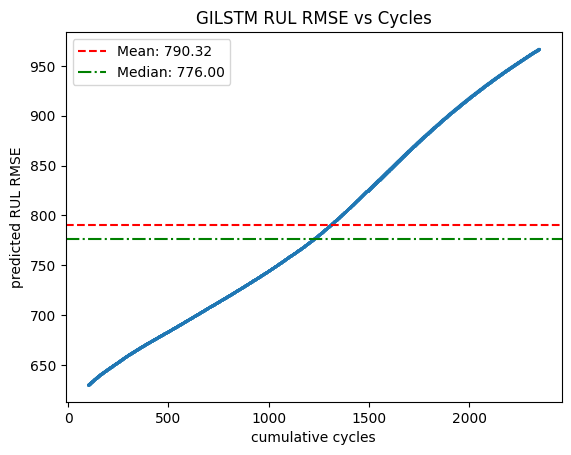

In [84]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

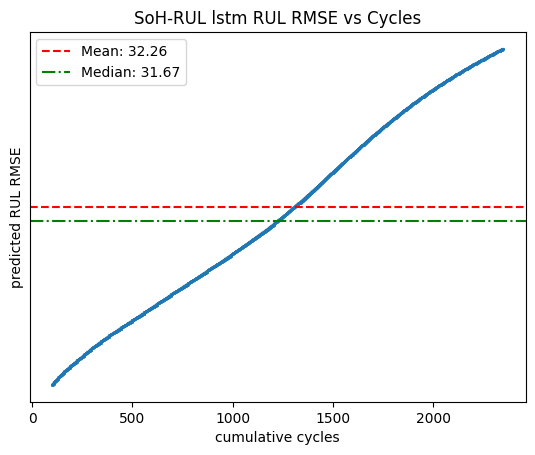

In [85]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [86]:
#save SoH to RUL rmse results
with open('GILSTM_1_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

## 3b. GILSTM cycle_to_cycle that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [87]:
model_columns = ['SoH']

print("# B: Setup variables and functions")
# # Set variables
# WINDOW_SIZE = 35
model_type = ['lstm','seq2seq-lstm','pinn'][2]

cutoff_soh = 0.70
# Set Computing Environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = len(model_columns)
OUTPUT_SIZE =3 #RUL #len(model_columns)#1 #controls how many values the lstm outputs
num_epochs = 1000 #60
batch_size = 4 #32 #because the data is little a small batch size is better when training
normalize_soh = False
I = 0
if normalize_soh:
    soh_normalization_constant = 115.0 #115.0 may be better as it allows bounding between 0 and 1
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer
else:
    soh_normalization_constant = 1.0
    cutoff_soh = cutoff_soh/soh_normalization_constant #set cutoff soh wrt to normalizer

class PhysicsInformedLSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=128):
        super().__init__()
        # Direct mapping: Input -> LSTM -> FC -> Output
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(128, 3) 
        
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor
    
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
        '''
        Converts a time series into (X, y) tensors for LSTM training.
        
        X shape: (num_samples, window_size, 1)
        y shape: (num_samples, 1)
        '''
        # if isinstance(df, (pd.DataFrame, pd.Series)):
        #     df_as_np = df.to_numpy()
        # else:
        #     df_as_np = df  # Assume already numpy
    
        X, y , y2 = [], [], []
        #for i in range(len(df_as_np) - window_size):
        #for i in range(len(df)-window_size):  
        if len(df) > window_size+I:
            X.append(list(df['SoH'])[I:window_size+I])
            #y.append([df_as_np[i + window_size:i + window_size+output_size]])
            y.append([list(df['k'])[-1],list(df['a'])[-1],list(df['b'])[-1]])
            #append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
            y2.append(list(df['rul'])[:1])
        X,y,y2 = np.array(X),np.array(y), np.array(y2)
        X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
        y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
        y_2_tensor = torch.tensor(y2, dtype=torch.float32)  #bug was here written y instead of y2
        return X_tensor, y_tensor, y_2_tensor
            
    
def get_x_y_lists(paths):
    X_list,y_list,y_target = [],[],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y , y1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
        y_target.append(y1) #RUL
    return X_list,y_list, y_target

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list, y_target = get_x_y_lists(paths)

    batch_size = torch.cat(X_list, dim=0).shape[0]
    
    if INPUT_SIZE == 1:
        # Concatenate all X and y
        X_1,y_1,y_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(batch_size,-1),torch.cat(y_target, dim=0).view(batch_size,-1)
    else:
        X_1,y_1,y_2 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(y_target, dim=0).view(-1,INPUT_SIZE)
    
    print(f" X_{data_type} shape : {X_1.shape} , y_{data_type} shape : {y_1.shape} ，y_2{data_type} shape: {y_2.shape}" )
    
    #DataLoader
    print("load : ")
    loader = DataLoader(TensorDataset(X_1, y_1, y_2), batch_size=32, shuffle=shuffle)
    print(f"{data_type}loader lengths : ",loader.__len__())
    return loader,X_1,y_1, y_2

data_use = {0:["train"],1:["val"],2:["test"]}

test_loader,X_test,y_test,y_test_target = give_paths_get_loaders(test_paths,data_use[2])
model = PhysicsInformedLSTM(input_size=INPUT_SIZE).to(device)

def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

# B: Setup variables and functions
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_['test'] shape : torch.Size([1, 100, 1]) , y_['test'] shape : torch.Size([1, 3]) ，y_2['test'] shape: torch.Size([1, 1])
load : 
['test']loader lengths :  1


In [88]:
model.load_state_dict(torch.load(f"models/best_lstm_model-window-100_model_pinn_data_all_cycle_to_cycle.pth",map_location=torch.device(device)))

cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,MAX_WINDOW-101)):
    test_rmse = 0
    test_loader,X_test,y_test,y_target = give_paths_get_loaders(test_paths,'test')
    for X_test, y_test, y_target in test_loader:
        X_test = X_test.to(device)
        y_pred = model(X_test)
        
        k_pred = y_pred[:, 0].cpu().detach().numpy()
        a_pred = y_pred[:, 1].cpu().detach().numpy()
        b_pred = y_pred[:, 2].cpu().detach().numpy()
        results = np.round(inverse_gompertz_func(y=0.7, k=k_pred, a=a_pred, b=b_pred), decimals=4)
        #print(results,'\n',y_target)
        #inference for test results
        test_rmse += root_mean_squared_error(results,y_target)
    
    print(f'\n Test RMSE for cycle {I} SoH to k,a,b then RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numers had been normalized using 10000
    if len(test_loader) > 0:
        cycle_rmse[I] = test_rmse/len(test_loader)*10000
        cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/(np.mean(y_target.cpu().detach().numpy())*10000)*100
    #break
    

  1%|          | 18/2488 [00:00<00:13, 176.99it/s]

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 100 SoH to k,a,b then RUL prediction :  273.00000190734863
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 101 SoH to k,a,b then RUL prediction :  273.00000190734863
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 102 SoH to k,a,b then RUL prediction :  273.00000190734863
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: 

  2%|▏         | 57/2488 [00:00<00:12, 188.22it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 136 SoH to k,a,b then RUL prediction :  279.00010347366333
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 137 SoH to k,a,b then RUL prediction :  279.00010347366333
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 138 SoH to k,a,b then RUL prediction :  279.00010347366333
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

  4%|▍         | 97/2488 [00:00<00:12, 192.46it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 175 SoH to k,a,b then RUL prediction :  286.0000729560852
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 176 SoH to k,a,b then RUL prediction :  287.0000898838043
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 177 SoH to k,a,b then RUL prediction :  287.0000898838043
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

  6%|▌         | 137/2488 [00:00<00:12, 194.93it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 215 SoH to k,a,b then RUL prediction :  297.00011014938354
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 216 SoH to k,a,b then RUL prediction :  297.00011014938354
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 217 SoH to k,a,b then RUL prediction :  297.00011014938354
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

  7%|▋         | 177/2488 [00:00<00:11, 195.70it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 255 SoH to k,a,b then RUL prediction :  310.0000321865082
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 256 SoH to k,a,b then RUL prediction :  310.0000321865082
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 257 SoH to k,a,b then RUL prediction :  311.0000491142273
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

  9%|▊         | 217/2488 [00:01<00:11, 196.53it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 295 SoH to k,a,b then RUL prediction :  333.99999141693115
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 296 SoH to k,a,b then RUL prediction :  335.00000834465027
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 297 SoH to k,a,b then RUL prediction :  336.0000252723694
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RM

 10%|█         | 257/2488 [00:01<00:11, 197.49it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 335 SoH to k,a,b then RUL prediction :  367.0001029968262
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 336 SoH to k,a,b then RUL prediction :  368.0001199245453
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 337 SoH to k,a,b then RUL prediction :  368.99998784065247
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMS

 12%|█▏        | 297/2488 [00:01<00:11, 197.65it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 375 SoH to k,a,b then RUL prediction :  406.000018119812
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 376 SoH to k,a,b then RUL prediction :  407.0000350475311
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 377 SoH to k,a,b then RUL prediction :  408.00005197525024
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 14%|█▎        | 337/2488 [00:01<00:10, 198.29it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 415 SoH to k,a,b then RUL prediction :  442.00003147125244
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 416 SoH to k,a,b then RUL prediction :  443.00004839897156
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 417 SoH to k,a,b then RUL prediction :  444.0000653266907
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RM

 15%|█▌        | 377/2488 [00:01<00:10, 198.40it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 455 SoH to k,a,b then RUL prediction :  470.0000584125519
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 456 SoH to k,a,b then RUL prediction :  470.0000584125519
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 457 SoH to k,a,b then RUL prediction :  471.000075340271
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE 

 17%|█▋        | 417/2488 [00:02<00:10, 198.56it/s]


 Test RMSE for cycle 495 SoH to k,a,b then RUL prediction :  489.0000820159912
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 496 SoH to k,a,b then RUL prediction :  490.0000989437103
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 497 SoH to k,a,b then RUL prediction :  490.0000989437103
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 498 SoH to k,a,b then RUL prediction :  490.0000989437103
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 18%|█▊        | 458/2488 [00:02<00:10, 198.74it/s]


 Test RMSE for cycle 535 SoH to k,a,b then RUL prediction :  503.00002098083496
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 536 SoH to k,a,b then RUL prediction :  503.00002098083496
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 537 SoH to k,a,b then RUL prediction :  504.0000379085541
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 538 SoH to k,a,b then RUL prediction :  504.0000379085541
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape

 20%|██        | 499/2488 [00:02<00:09, 199.26it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 576 SoH to k,a,b then RUL prediction :  513.0000412464142
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 577 SoH to k,a,b then RUL prediction :  514.0000581741333
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 578 SoH to k,a,b then RUL prediction :  514.0000581741333
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 22%|██▏       | 539/2488 [00:02<00:09, 199.15it/s]


 Test RMSE for cycle 616 SoH to k,a,b then RUL prediction :  521.0000276565552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 617 SoH to k,a,b then RUL prediction :  521.0000276565552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 618 SoH to k,a,b then RUL prediction :  521.0000276565552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 619 SoH to k,a,b then RUL prediction :  521.0000276565552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 23%|██▎       | 580/2488 [00:02<00:09, 199.21it/s]


 Test RMSE for cycle 656 SoH to k,a,b then RUL prediction :  526.9999802112579
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 657 SoH to k,a,b then RUL prediction :  526.9999802112579
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 658 SoH to k,a,b then RUL prediction :  526.9999802112579
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 659 SoH to k,a,b then RUL prediction :  526.9999802112579
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 25%|██▍       | 621/2488 [00:03<00:09, 199.71it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 697 SoH to k,a,b then RUL prediction :  531.0000479221344
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 698 SoH to k,a,b then RUL prediction :  531.0000479221344
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 699 SoH to k,a,b then RUL prediction :  531.0000479221344
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 27%|██▋       | 662/2488 [00:03<00:09, 199.61it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 738 SoH to k,a,b then RUL prediction :  535.0001156330109
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 739 SoH to k,a,b then RUL prediction :  535.0001156330109
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 740 SoH to k,a,b then RUL prediction :  535.0001156330109
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 28%|██▊       | 703/2488 [00:03<00:08, 199.50it/s]


 Test RMSE for cycle 778 SoH to k,a,b then RUL prediction :  538.0000174045563
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 779 SoH to k,a,b then RUL prediction :  538.0000174045563
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 780 SoH to k,a,b then RUL prediction :  538.0000174045563
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 781 SoH to k,a,b then RUL prediction :  538.0000174045563
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 30%|██▉       | 743/2488 [00:03<00:08, 199.03it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 819 SoH to k,a,b then RUL prediction :  541.0000681877136
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 820 SoH to k,a,b then RUL prediction :  541.0000681877136
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 821 SoH to k,a,b then RUL prediction :  541.0000681877136
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 32%|███▏      | 784/2488 [00:03<00:08, 199.16it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 859 SoH to k,a,b then RUL prediction :  543.0001020431519
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 860 SoH to k,a,b then RUL prediction :  544.000118970871
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 861 SoH to k,a,b then RUL prediction :  544.000118970871
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE f

 33%|███▎      | 825/2488 [00:04<00:08, 199.48it/s]


 Test RMSE for cycle 899 SoH to k,a,b then RUL prediction :  546.0000038146973
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 900 SoH to k,a,b then RUL prediction :  546.0000038146973
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 901 SoH to k,a,b then RUL prediction :  546.0000038146973
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 902 SoH to k,a,b then RUL prediction :  546.0000038146973
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 35%|███▍      | 865/2488 [00:04<00:08, 199.04it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 940 SoH to k,a,b then RUL prediction :  548.0000376701355
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 941 SoH to k,a,b then RUL prediction :  548.0000376701355
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 942 SoH to k,a,b then RUL prediction :  548.0000376701355
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 36%|███▋      | 906/2488 [00:04<00:07, 199.76it/s]


 Test RMSE for cycle 980 SoH to k,a,b then RUL prediction :  550.0000715255737
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 981 SoH to k,a,b then RUL prediction :  550.0000715255737
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 982 SoH to k,a,b then RUL prediction :  550.0000715255737
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 983 SoH to k,a,b then RUL prediction :  550.0000715255737
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 38%|███▊      | 947/2488 [00:04<00:07, 199.38it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1021 SoH to k,a,b then RUL prediction :  552.000105381012
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1022 SoH to k,a,b then RUL prediction :  552.000105381012
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1023 SoH to k,a,b then RUL prediction :  552.000105381012
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 40%|███▉      | 988/2488 [00:04<00:07, 199.58it/s]


 Test RMSE for cycle 1061 SoH to k,a,b then RUL prediction :  552.9999732971191
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1062 SoH to k,a,b then RUL prediction :  553.9999902248383
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1063 SoH to k,a,b then RUL prediction :  553.9999902248383
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1064 SoH to k,a,b then RUL prediction :  553.9999902248383
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test sha

 41%|████▏     | 1030/2488 [00:05<00:07, 200.51it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1102 SoH to k,a,b then RUL prediction :  555.0000071525574
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1103 SoH to k,a,b then RUL prediction :  555.0000071525574
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1104 SoH to k,a,b then RUL prediction :  555.0000071525574
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 43%|████▎     | 1072/2488 [00:05<00:07, 199.86it/s]


 Test RMSE for cycle 1142 SoH to k,a,b then RUL prediction :  557.0000410079956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1143 SoH to k,a,b then RUL prediction :  557.0000410079956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1144 SoH to k,a,b then RUL prediction :  557.0000410079956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1145 SoH to k,a,b then RUL prediction :  557.0000410079956
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test sha

 45%|████▍     | 1113/2488 [00:05<00:06, 199.54it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1183 SoH to k,a,b then RUL prediction :  559.0000748634338
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1184 SoH to k,a,b then RUL prediction :  559.0000748634338
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1185 SoH to k,a,b then RUL prediction :  559.0000748634338
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 46%|████▋     | 1154/2488 [00:05<00:06, 199.84it/s]


 Test RMSE for cycle 1223 SoH to k,a,b then RUL prediction :  560.000091791153
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1224 SoH to k,a,b then RUL prediction :  560.000091791153
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1225 SoH to k,a,b then RUL prediction :  560.000091791153
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1226 SoH to k,a,b then RUL prediction :  560.000091791153
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape :

 48%|████▊     | 1195/2488 [00:06<00:06, 199.93it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1264 SoH to k,a,b then RUL prediction :  561.9999766349792
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1265 SoH to k,a,b then RUL prediction :  561.9999766349792
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1266 SoH to k,a,b then RUL prediction :  561.9999766349792
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 50%|████▉     | 1236/2488 [00:06<00:06, 200.36it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1305 SoH to k,a,b then RUL prediction :  564.0000104904175
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1306 SoH to k,a,b then RUL prediction :  564.0000104904175
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1307 SoH to k,a,b then RUL prediction :  564.0000104904175
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 51%|█████▏    | 1278/2488 [00:06<00:06, 200.55it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1346 SoH to k,a,b then RUL prediction :  566.0000443458557
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1347 SoH to k,a,b then RUL prediction :  566.0000443458557
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1348 SoH to k,a,b then RUL prediction :  566.0000443458557
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 53%|█████▎    | 1320/2488 [00:06<00:05, 200.43it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1387 SoH to k,a,b then RUL prediction :  567.0000612735748
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1388 SoH to k,a,b then RUL prediction :  567.0000612735748
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1389 SoH to k,a,b then RUL prediction :  567.0000612735748
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 55%|█████▍    | 1362/2488 [00:06<00:05, 200.48it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1428 SoH to k,a,b then RUL prediction :  569.0000951290131
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1429 SoH to k,a,b then RUL prediction :  569.0000951290131
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1430 SoH to k,a,b then RUL prediction :  569.0000951290131
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 56%|█████▋    | 1404/2488 [00:07<00:05, 200.79it/s]

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1469 SoH to k,a,b then RUL prediction :  570.9999799728394
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1470 SoH to k,a,b then RUL prediction :  570.9999799728394
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1471 SoH to k,a,b then RUL prediction :  570.9999799728394
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: 

 57%|█████▋    | 1425/2488 [00:07<00:05, 200.62it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1509 SoH to k,a,b then RUL prediction :  573.0000138282776
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1510 SoH to k,a,b then RUL prediction :  573.0000138282776
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1511 SoH to k,a,b then RUL prediction :  573.0000138282776
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 58%|█████▊    | 1446/2488 [00:07<00:05, 200.60it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1545 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1546 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1547 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 59%|█████▉    | 1467/2488 [00:07<00:05, 200.81it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1550 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1551 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1552 SoH to k,a,b then RUL prediction :  574.0000307559967
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 60%|█████▉    | 1488/2488 [00:07<00:04, 200.44it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1586 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1587 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1588 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 61%|██████    | 1509/2488 [00:07<00:04, 200.38it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1591 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1592 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1593 SoH to k,a,b then RUL prediction :  576.0000646114349
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 61%|██████▏   | 1530/2488 [00:07<00:04, 200.44it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1627 SoH to k,a,b then RUL prediction :  577.000081539154
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1628 SoH to k,a,b then RUL prediction :  577.000081539154
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1629 SoH to k,a,b then RUL prediction :  577.000081539154
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 62%|██████▏   | 1551/2488 [00:07<00:04, 200.71it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1632 SoH to k,a,b then RUL prediction :  578.0000984668732
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1633 SoH to k,a,b then RUL prediction :  578.0000984668732
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1634 SoH to k,a,b then RUL prediction :  578.0000984668732
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 63%|██████▎   | 1572/2488 [00:07<00:04, 200.38it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1668 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1669 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1670 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 64%|██████▍   | 1593/2488 [00:08<00:04, 200.23it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1673 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1674 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1675 SoH to k,a,b then RUL prediction :  579.0001153945923
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 65%|██████▍   | 1614/2488 [00:08<00:04, 200.19it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1709 SoH to k,a,b then RUL prediction :  579.9999833106995
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1710 SoH to k,a,b then RUL prediction :  579.9999833106995
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1711 SoH to k,a,b then RUL prediction :  581.0000002384186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 66%|██████▌   | 1635/2488 [00:08<00:04, 200.82it/s]

gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1714 SoH to k,a,b then RUL prediction :  581.0000002384186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1715 SoH to k,a,b then RUL prediction :  581.0000002384186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1716 SoH to k,a,b then RUL prediction :  581.0000002384186
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: 

 67%|██████▋   | 1677/2488 [00:08<00:04, 201.55it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1754 SoH to k,a,b then RUL prediction :  582.0000171661377
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1755 SoH to k,a,b then RUL prediction :  582.0000171661377
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1756 SoH to k,a,b then RUL prediction :  582.0000171661377
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 69%|██████▉   | 1719/2488 [00:08<00:03, 200.95it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1795 SoH to k,a,b then RUL prediction :  584.0000510215759
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1796 SoH to k,a,b then RUL prediction :  584.0000510215759
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1797 SoH to k,a,b then RUL prediction :  584.0000510215759
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 71%|███████   | 1761/2488 [00:08<00:03, 201.20it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1836 SoH to k,a,b then RUL prediction :  585.000067949295
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1837 SoH to k,a,b then RUL prediction :  585.000067949295
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1838 SoH to k,a,b then RUL prediction :  585.000067949295
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE

 72%|███████▏  | 1803/2488 [00:09<00:03, 201.40it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1877 SoH to k,a,b then RUL prediction :  586.0000848770142
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1878 SoH to k,a,b then RUL prediction :  586.0000848770142
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1879 SoH to k,a,b then RUL prediction :  586.0000848770142
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 74%|███████▍  | 1845/2488 [00:09<00:03, 201.44it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1918 SoH to k,a,b then RUL prediction :  588.0001187324524
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1919 SoH to k,a,b then RUL prediction :  588.0001187324524
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1920 SoH to k,a,b then RUL prediction :  588.0001187324524
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 76%|███████▌  | 1887/2488 [00:09<00:02, 201.25it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1959 SoH to k,a,b then RUL prediction :  588.9999866485596
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1960 SoH to k,a,b then RUL prediction :  588.9999866485596
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 1961 SoH to k,a,b then RUL prediction :  588.9999866485596
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 78%|███████▊  | 1929/2488 [00:09<00:02, 201.34it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2000 SoH to k,a,b then RUL prediction :  590.0000035762787
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2001 SoH to k,a,b then RUL prediction :  590.0000035762787
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2002 SoH to k,a,b then RUL prediction :  590.0000035762787
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 79%|███████▉  | 1971/2488 [00:09<00:02, 201.31it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2041 SoH to k,a,b then RUL prediction :  591.0000205039978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2042 SoH to k,a,b then RUL prediction :  591.0000205039978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2043 SoH to k,a,b then RUL prediction :  591.0000205039978
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 81%|████████  | 2013/2488 [00:10<00:02, 201.46it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2082 SoH to k,a,b then RUL prediction :  592.0000374317169
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2083 SoH to k,a,b then RUL prediction :  592.0000374317169
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2084 SoH to k,a,b then RUL prediction :  592.0000374317169
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 83%|████████▎ | 2055/2488 [00:10<00:02, 201.21it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2123 SoH to k,a,b then RUL prediction :  593.000054359436
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2124 SoH to k,a,b then RUL prediction :  594.0000712871552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2125 SoH to k,a,b then RUL prediction :  594.0000712871552
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RM

 84%|████████▍ | 2097/2488 [00:10<00:01, 201.18it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2164 SoH to k,a,b then RUL prediction :  595.0000882148743
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2165 SoH to k,a,b then RUL prediction :  595.0000882148743
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2166 SoH to k,a,b then RUL prediction :  595.0000882148743
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 86%|████████▌ | 2139/2488 [00:10<00:01, 201.43it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2205 SoH to k,a,b then RUL prediction :  596.0001051425934
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2206 SoH to k,a,b then RUL prediction :  596.0001051425934
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2207 SoH to k,a,b then RUL prediction :  596.0001051425934
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 88%|████████▊ | 2181/2488 [00:10<00:01, 202.22it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2246 SoH to k,a,b then RUL prediction :  597.0001220703125
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2247 SoH to k,a,b then RUL prediction :  597.0001220703125
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2248 SoH to k,a,b then RUL prediction :  597.0001220703125
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 89%|████████▉ | 2223/2488 [00:11<00:01, 201.60it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2287 SoH to k,a,b then RUL prediction :  597.9999899864197
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2288 SoH to k,a,b then RUL prediction :  597.9999899864197
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2289 SoH to k,a,b then RUL prediction :  597.9999899864197
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

 90%|█████████ | 2250/2488 [00:11<00:01, 199.35it/s]

 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2328 SoH to k,a,b then RUL prediction :  597.9999899864197
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2329 SoH to k,a,b then RUL prediction :  599.0000069141388
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test RMSE for cycle 2330 SoH to k,a,b then RUL prediction :  599.0000069141388
gompertz-parameters-per-cycle/6-8-hust_gompertz_params.csv
 X_test shape : torch.Size([1, 100, 1]) , y_test shape : torch.Size([1, 3]) ，y_2test shape: torch.Size([1, 1])
load : 
testloader lengths :  1

 Test R

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1] because the unspecified dimension size -1 can be any value and is ambiguous

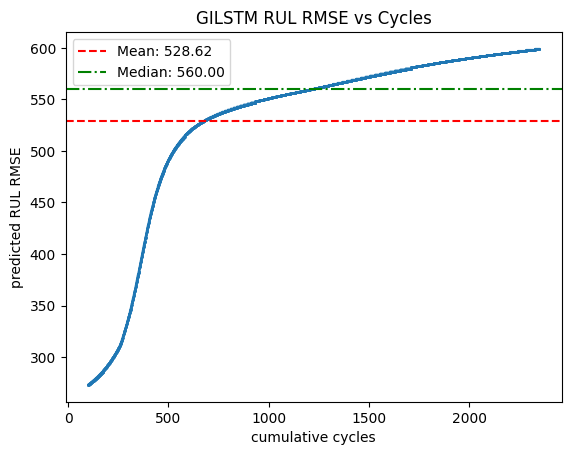

In [89]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

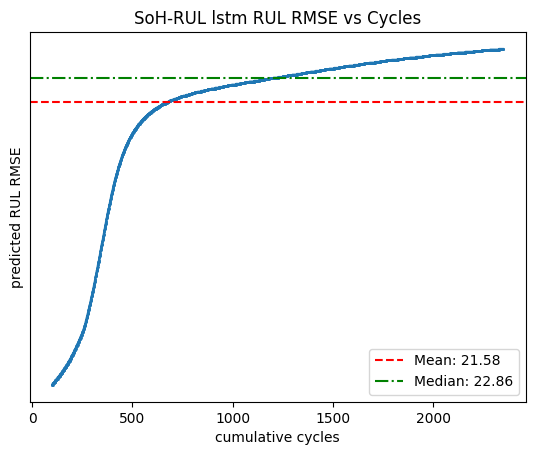

In [90]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [91]:
cycle_rmse[100],cycle_nrmse[100]

(273.00000190734863, 11.142857003837566)

In [92]:
#save SoH to RUL rmse results
with open('GILSTM_2_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [93]:
## Use NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML) or 500, 1000 to improve the accuracy and the output is k,a and b. Here usage of dy/dx may be crucial.


## 3c. LSTMs that predict SoH from SoH then pass the predicted curve through a gompertz fitting model and calculate rul using the inverse gompertz eqn 

In [94]:
## use models from 2b to accomplish this.

In [95]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y, X1 = [], [],[]
    
    if len(df) > window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[:1])
        X1.append(list(df['SoH'])[:window_size+I])
        # X.append(list(df['SoH'])[I:window_size+I])
        # y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y,X1 = np.array(X),np.array(y),np.array(X1)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    X1_tensor = torch.tensor(X1, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor,X1_tensor

def get_x_y_lists(paths):
    X_list,y_list,X1_list = [],[],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y, X1 = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
        X1_list.append(X1)
    return X_list,y_list,X1_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list, X1_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1,X_2 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE),torch.cat(X1_list, dim=0).unsqueeze(-1)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1,X_2), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1,X_2

def forecast_RUL(loader,X_test,y_test,model):
    ## A function to handle the model's recursive nature and compute RUL
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
    
    # Now current_window is updated for the next iteration
    
    # 1. Stack into a single tensor: [Steps, Batch, Features]
    # We want to analyze feature 0 (Capacity)
    all_preds_tensor = torch.stack(all_step_predictions) 
    capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]
    
    # 2. Create a boolean mask where Capacity <= 0.7
    # Shape: [Steps, Batch]
    is_failed = capacity_forecasts <= 0.7
    
    # 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
    # torch.argmax returns the index of the first 'True' it finds.
    # If a cell never hits 0.7, it returns 0 (we will handle this below).
    steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)
    
    # 4. Handle cells that never reached the threshold
    # argmax returns 0 if no True is found. We check if the value at that 
    # index is actually <= 0.7 to verify it really failed.
    never_failed = ~is_failed.any(dim=0)
    steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure
    
    # 5. Convert to list or print results
    failure_steps_list = steps_to_failure.tolist()
    RUL_steps = []
    for i, steps in enumerate(failure_steps_list):
        status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
        #print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")
        RUL_steps.append(steps+WINDOW_SIZE+I)
    return RUL_steps

In [96]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test,X1_test = give_paths_get_loaders(test_paths,'test')

In [97]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML)
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [32, 10, 5]
        
        # Run LSTM
        # lstm_out shape: [32, 10, 64]
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        # last_time_step shape: [32, 64]
        
        # Project to 5 output features
        prediction = self.fc(last_time_step)
        # prediction shape: [32, 5]
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
model.load_state_dict(torch.load(f"models/SoH-to-SoH-best_lstm_model-window-100.pth",map_location=torch.device(device)))
#generate test_loader
test_rmse = 0
for X_test, y_test,X1_test in test_loader:
    X_test = X_test.to(device)
    X1_test = X1_test.to(device)
    y_pred = model(X_test)
    #print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

#print('\n Test RMSE for SoH to SoH prediction : ',test_rmse/len(test_loader))

In [98]:
RUL_steps = forecast_RUL(test_loader,X_test,y_test,model)

In [99]:
all_step_predictions = []
current_window = X_test.clone() # Start with the initial X from loader

# Number of steps you want to forecast into the future
forecast_steps = 3000 

for _ in range(forecast_steps):
    # 1. Get prediction for current window
    # y_pred shape: [Batch, 1] (Next Capacity)
    y_pred = model(current_window)
    
    # Store for evaluation
    all_step_predictions.append(y_pred.detach())

    # 2. UPDATE ALL BATCHES AT ONCE
    # Assuming the value you append is the 1st column of your prediction
    # or the only column if predicting capacity directly.
    next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
    
    # Drop index 0, append new value to end
    current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)

# Now current_window is updated for the next iteration

In [100]:
# 1. Stack the list into a single tensor: [Steps, Batch, 4]
from scipy.optimize import minimize


# Define the loss function
def loss_function(params, x, d):
    k , a, b = params  # Parameters to optimize
    predicted_d = gompertz_func(x,k,a,b) # Equation model
    return np.sum((predicted_d - d) ** 2)
                  
#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))

all_preds_tensor = torch.stack(all_step_predictions) 

for i in range(0,len(all_step_predictions[-1])):
    # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
    # Shape will be [Steps]
    first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
    
    # 3. Create a time/cycle axis for the forecast
    start_cycle = 101 # Assuming your window was 100
    cycles = range(start_cycle, start_cycle + len(first_battery_forecast))

    
    
    x_data = np.concatenate((np.array(range(1,start_cycle)),np.array(cycles[:RUL_steps[i]])))/10000.0
    y_data = np.concatenate((X1_test[i,:,0].cpu().numpy(),np.array(first_battery_forecast[:RUL_steps[i]])))
    
    

    # Initial guess for a, b, c
    initial_guess = [1, 1, 1]
    
    # Perform optimization
    result = minimize(loss_function, initial_guess, args=(x_data, y_data))
    
    #popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
    # Predict
    x_future = np.linspace(0, 1, 3000)
    
    op_k, op_a, op_b = result.x
    #print(op_k, op_a, op_b,np.round(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b), decimals=4),RUL_steps[i],y_test[i,:].cpu().numpy())
    # y_pred = gompertz_func(x_future, op_k, op_a, op_b)
    # # Plot
    # plt.plot(x_data, y_data, label='Observed')
    # plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
    # # plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
    # # plt.legend()
    # plt.xlabel("Normalized Cycles")
    # plt.ylabel("SoH")
    # plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
    # plt.title("Gompertz Fit Real Time")
    # plt.grid(False)
    # plt.legend()
    # plt.show()

In [101]:
x_data, y_data, x_future

(array([1.000e-04, 2.000e-04, 3.000e-04, ..., 2.190e-01, 2.191e-01,
        2.192e-01]),
 array([0.970748  , 0.96981215, 0.9693366 , ..., 0.6902681 , 0.6901921 ,
        0.69011664], dtype=float32),
 array([0.00000000e+00, 3.33444481e-04, 6.66888963e-04, ...,
        9.99333111e-01, 9.99666556e-01, 1.00000000e+00]))

In [102]:
X1_test[i,:,0].shape

torch.Size([100])

In [103]:
#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))

def confirm_SoH_SoH_via_Gompertz(test_loader,X_test,y_test,model,I,X1_test):
    
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
        
    RUL_steps = forecast_RUL(test_loader,X_test,y_test,model)
    
    all_preds_tensor = torch.stack(all_step_predictions) 
    gompertz_predictions = []
    for i in range(0,len(all_step_predictions[-1])):
        # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
        # Shape will be [Steps]
        first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
        
        # 3. Create a time/cycle axis for the forecast
        start_cycle = 101+I # start cycle from 100
        cycles = range(start_cycle, start_cycle + len(first_battery_forecast))
    
        
        
        x_data = np.concatenate((np.array(range(1,start_cycle)),np.array(cycles[:RUL_steps[i]])))/10000.0
        y_data = np.concatenate((X1_test[i,:,0].cpu().numpy(),np.array(first_battery_forecast[:RUL_steps[i]])))
        
        
    
        # Initial guess for a, b, c
        initial_guess = [1, 1, 1]
        
        # Perform optimization
        result = minimize(loss_function, initial_guess, args=(x_data, y_data))
        
        #popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
        # Predict
        x_future = np.linspace(0, 1, 3000)
        
        op_k, op_a, op_b = result.x
        #print(op_k, op_a, op_b,np.round(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b), decimals=4),RUL_steps[i],y_test[i,:].cpu().numpy())
        gompertz_predictions.append(inverse_gompertz_func(y=0.7, k=op_k, a=op_a, b=op_b))
    return gompertz_predictions#,y_test[i,:].cpu().numpy()

In [104]:
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in range(WINDOW_SIZE,MAX_WINDOW):
    I -= 100
    test_rmse = 0
    test_loader,X_test,y_test,X1_test = give_paths_get_loaders(test_paths,'test')
    if len(test_loader) > 0:  
        for X_test, y_test,X1_test in test_loader:
            X_test = X_test.to(device)
            X1_test = X1_test.to(device)
            break
        y_preds = confirm_SoH_SoH_via_Gompertz(test_loader,X_test,y_test,model,I,X1_test)#forecast_RUL(test_loader,X_test,y_test,model)
        test_rmse = 10000*(root_mean_squared_error(y_test, y_preds)/len(test_loader))#multiply by 10,000 because cycle numers had been normalized using 10000
        
        I += 100
        print(f'RMSE for cycle {I} is {test_rmse}') #,{y_test, y_preds}')
    
    
        cycle_rmse[I] = test_rmse
        cycle_nrmse[I] = test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100
    #break

RMSE for cycle 100 is 375.3419110349046
RMSE for cycle 101 is 375.8245466812993
RMSE for cycle 102 is 377.49027290814917
RMSE for cycle 103 is 378.94703861931026
RMSE for cycle 104 is 379.70366808481424
RMSE for cycle 105 is 378.4978680473344
RMSE for cycle 106 is 380.2556629129669
RMSE for cycle 107 is 381.71157377196033
RMSE for cycle 108 is 382.9280005661398
RMSE for cycle 109 is 383.0821954144381
RMSE for cycle 110 is 383.411131250066
RMSE for cycle 111 is 384.9611534816749
RMSE for cycle 112 is 385.7973079959326
RMSE for cycle 113 is 386.4052026857329
RMSE for cycle 114 is 386.81744276794274
RMSE for cycle 115 is 383.53362371161325
RMSE for cycle 116 is 383.42172396468504
RMSE for cycle 117 is 384.93566632679665
RMSE for cycle 118 is 386.24747803820605
RMSE for cycle 119 is 390.03554891273245
RMSE for cycle 120 is 390.26502729833794
RMSE for cycle 121 is 389.8942828667593
RMSE for cycle 122 is 388.9572880965933
RMSE for cycle 123 is 389.6371089927464
RMSE for cycle 124 is 390.1474

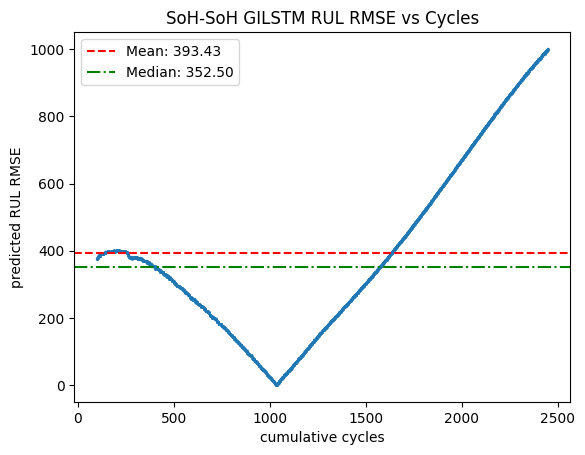

In [105]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

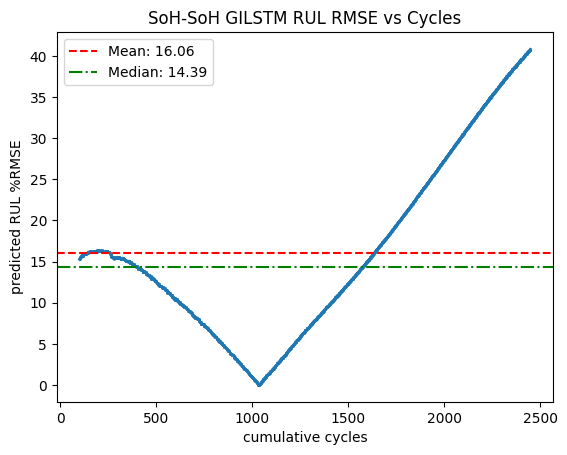

In [106]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-SoH GILSTM RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [107]:
cycle_rmse[100],cycle_nrmse[100]

(375.3419110349046, 15.320077703253974)

In [108]:
#save SoH to RUL rmse results
with open('GILSTM_3_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [109]:
cycle_rmse

{100: 375.3419110349046,
 101: 375.8245466812993,
 102: 377.49027290814917,
 103: 378.94703861931026,
 104: 379.70366808481424,
 105: 378.4978680473344,
 106: 380.2556629129669,
 107: 381.71157377196033,
 108: 382.9280005661398,
 109: 383.0821954144381,
 110: 383.411131250066,
 111: 384.9611534816749,
 112: 385.7973079959326,
 113: 386.4052026857329,
 114: 386.81744276794274,
 115: 383.53362371161325,
 116: 383.42172396468504,
 117: 384.93566632679665,
 118: 386.24747803820605,
 119: 390.03554891273245,
 120: 390.26502729833794,
 121: 389.8942828667593,
 122: 388.9572880965933,
 123: 389.6371089927464,
 124: 390.14740126212394,
 125: 390.4631383709023,
 126: 390.21820818973237,
 127: 389.8233701656964,
 128: 389.3133229753748,
 129: 390.06397863871,
 130: 390.59100992539896,
 131: 390.9431299472121,
 132: 390.71960152479573,
 133: 390.3492821615503,
 134: 391.18940275744643,
 135: 391.81172338206864,
 136: 392.2395966082229,
 137: 392.0763022235754,
 138: 392.1516594443314,
 139: 393.0

In [124]:
file_list = ["gompertz_rmse_results.pkl","SOH_to_RUL_rmse_results.pkl","SOH_to_SoH_RUL_rmse_results.pkl","GILSTM_1_rmse_results.pkl","GILSTM_2_rmse_results.pkl","GILSTM_3_rmse_results.pkl"]
models_names_list = ["Gompertz","LSTM1","GILSTM1","GILSTM2","GILSTM3"]
# A list to store the contents of all files
all_contents = []

for file_path in file_list:
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            all_contents.append(data)
            print(f"Successfully loaded {file_path}")
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading {file_path}: {e}")

# Now all_contents contains the data from every file
cycle_rmses = {name : content[0] for name, content in zip(models_names_list, all_contents)}
#cycle_nrmses = {content[1] for content in all_contents}

Successfully loaded gompertz_rmse_results.pkl
Successfully loaded SOH_to_RUL_rmse_results.pkl
Successfully loaded GILSTM_1_rmse_results.pkl
Successfully loaded GILSTM_2_rmse_results.pkl
Successfully loaded GILSTM_3_rmse_results.pkl


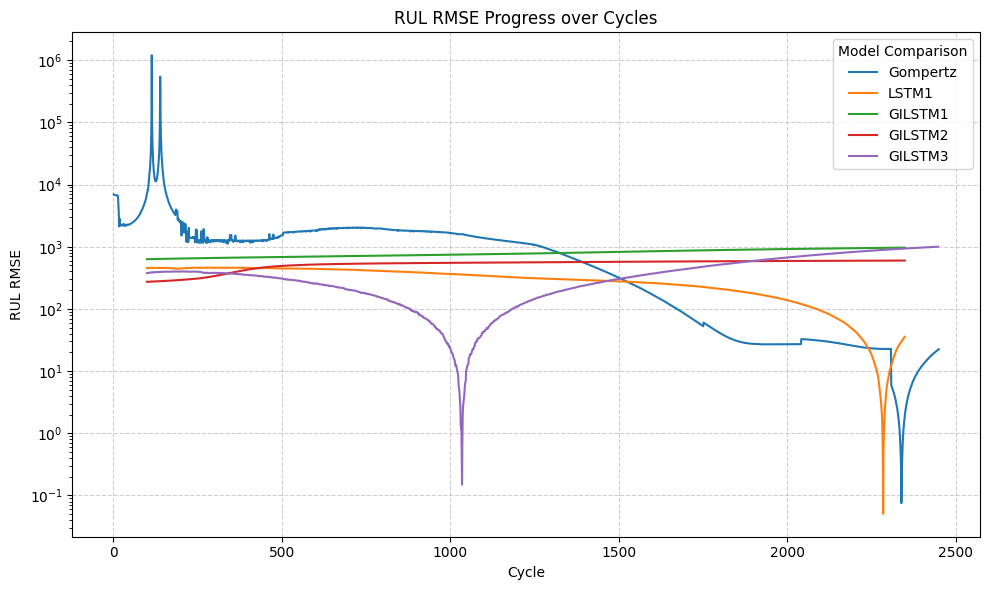

<Figure size 640x480 with 0 Axes>

In [126]:
#cycle rmses

plt.figure(figsize=(10, 6))

# 2. Iterate and plot each one
for label, data_dict in cycle_rmses.items():
    # Sorting keys (cycles) to ensure the line is drawn correctly
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    plt.plot(sorted_cycles, rmse_values, linestyle='-', label=label)

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL RMSE Progress over Cycles')
plt.legend(title="Model Comparison") # Displays the labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Show or Save the plot
plt.show()
plt.savefig('rmse_comparison.png')